In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Vito,Saverio. (2016). Air Quality. UCI Machine Learning Repository. 
https://doi.org/10.24432/C59K5F. 
 
https://archive.ics.uci.edu/dataset/360/air+quality 


In [40]:
df= pd.read_excel(r'C:\Users\DELL\Downloads\deep-panel\deep-panel\data\raw\AirQualityUCI.xlsx')
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

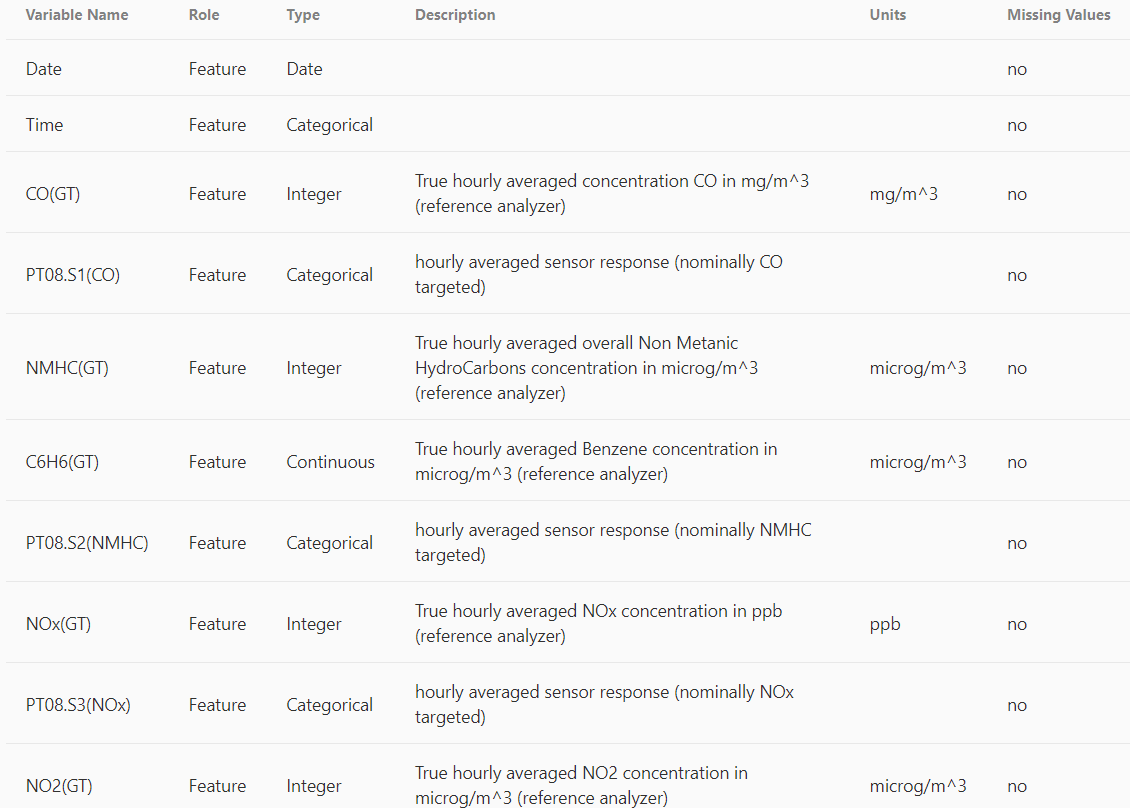
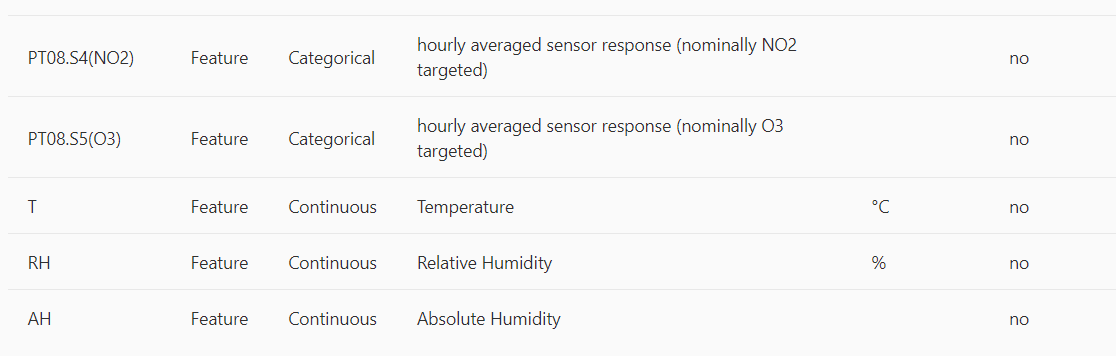

In [41]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH            DateTime  
0  13.60  48.875001  0.757754 2004-03-10 18:00:00  
1  13.30  47.700000  0.725487 2004-03-10 19:00:00  
2  11.90  53.975000  0.750239 2004-03-10 20:00:00  
3  11.00  60.000000  0.786713 2004-03-10 21:00:00  
4  11.15  59.575001  0.788794 2004-03-10 22:00:00

In [42]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
dtype: object

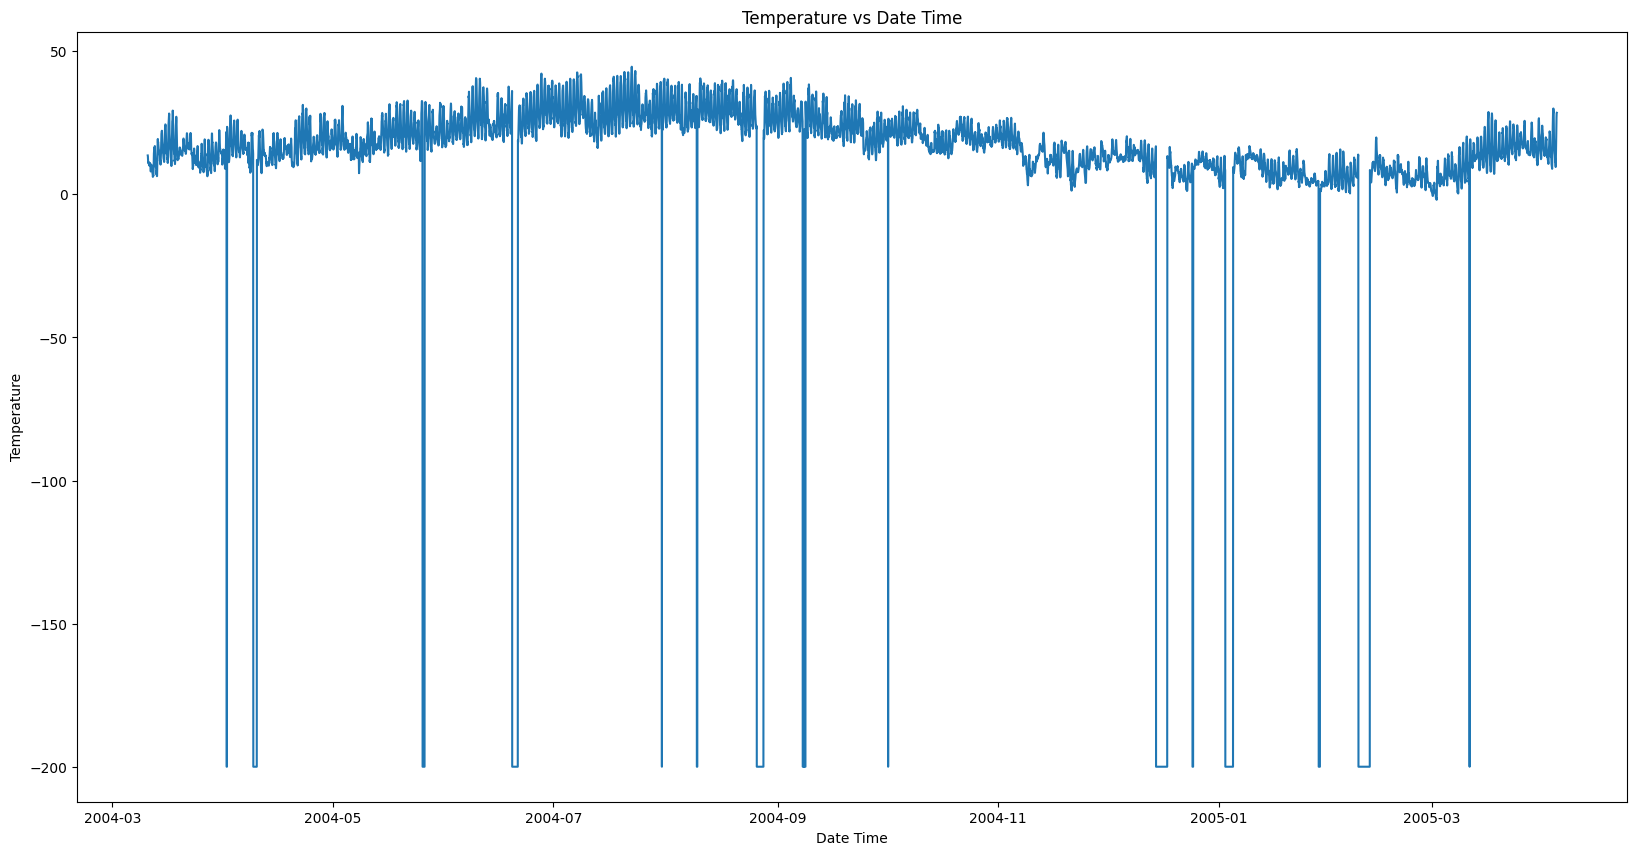

In [43]:
# plot how T varies with date time
plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['T'])
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Temperature vs Date Time')
plt.show()

In [44]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64

In [45]:
df.shape

(9357, 16)

In [46]:
# in all columns if value is -200, replace it with NaN
df = df.replace(-200, np.nan)
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64

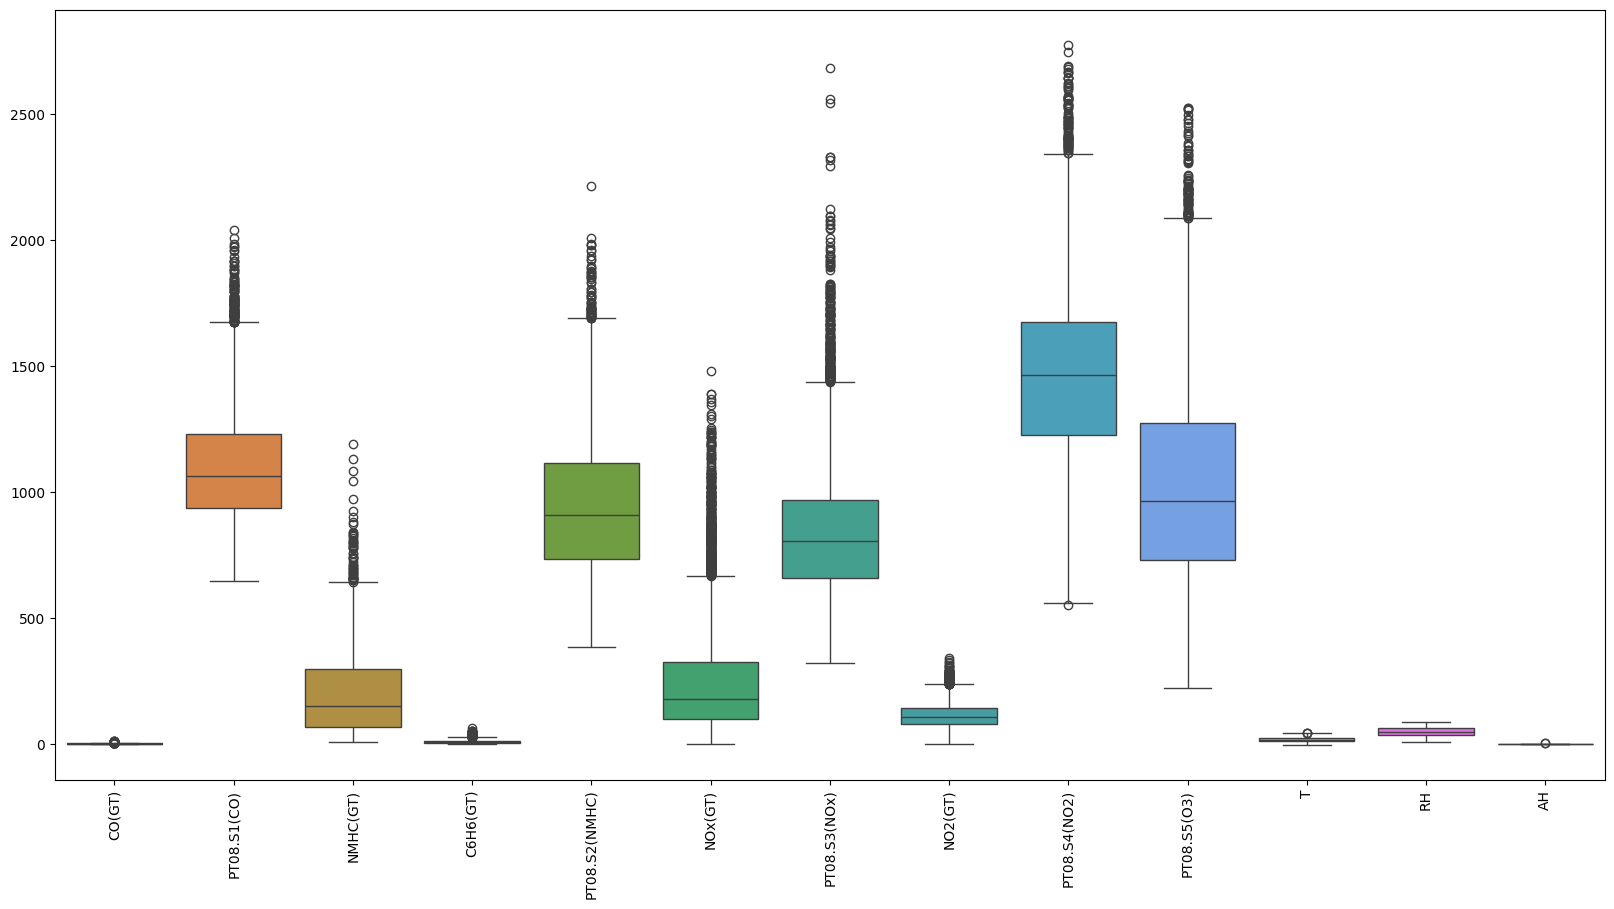

In [47]:
#  draw boxplot to see the distribution of each column
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

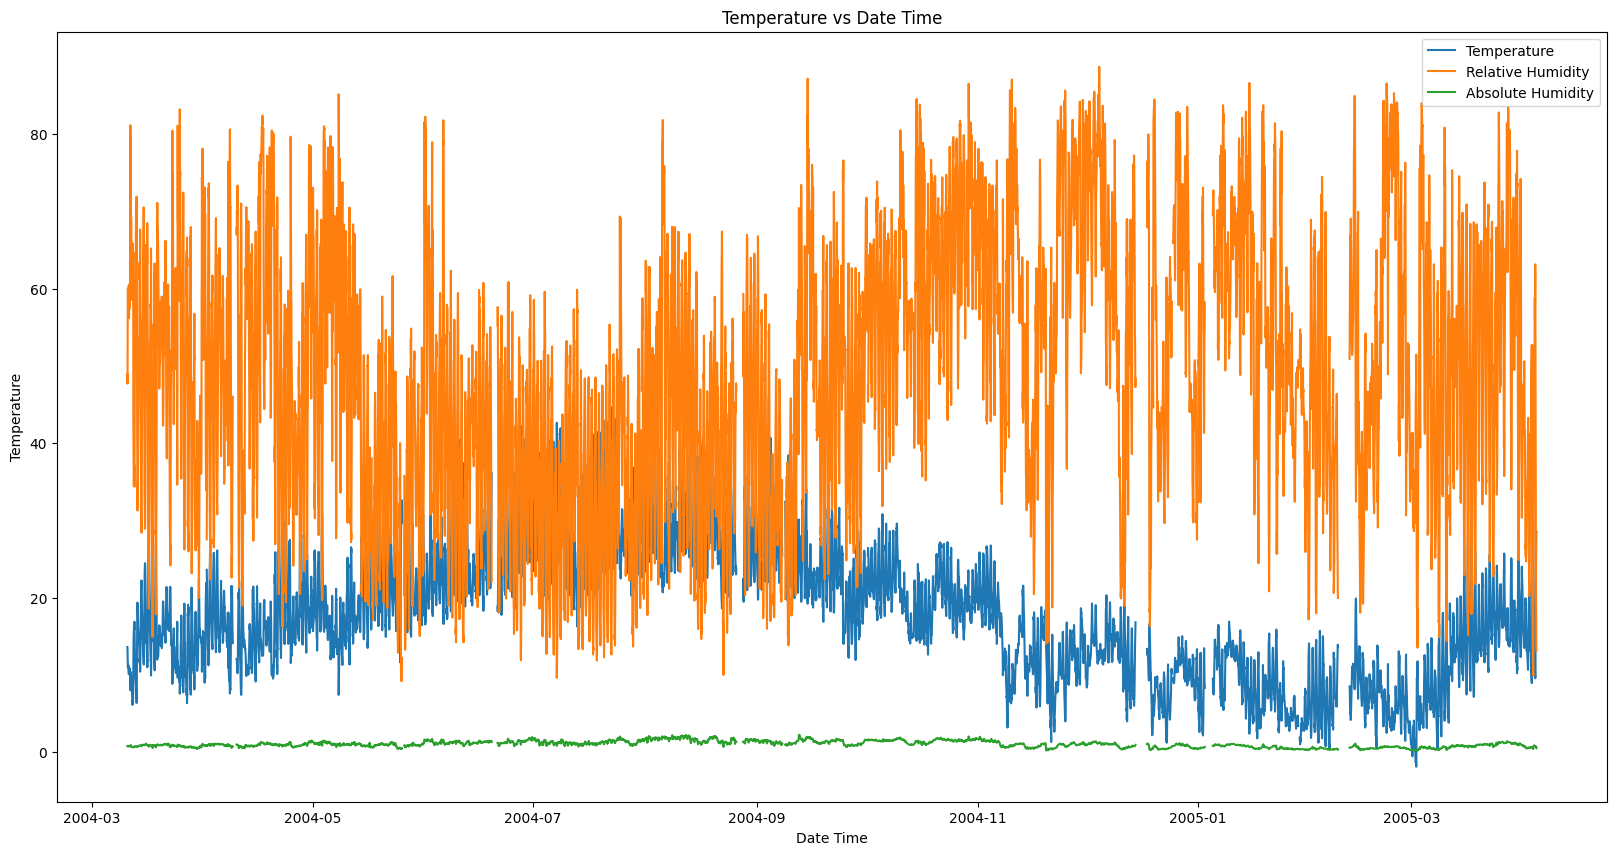

In [48]:
#  draw how each column varies with date time
plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['T'], label='Temperature')
plt.plot(df['DateTime'], df['RH'], label='Relative Humidity')
plt.plot(df['DateTime'], df['AH'], label='Absolute Humidity')
plt.xlabel('Date Time')
plt.ylabel('Temperature')
plt.title('Temperature vs Date Time')
plt.legend()
plt.show()

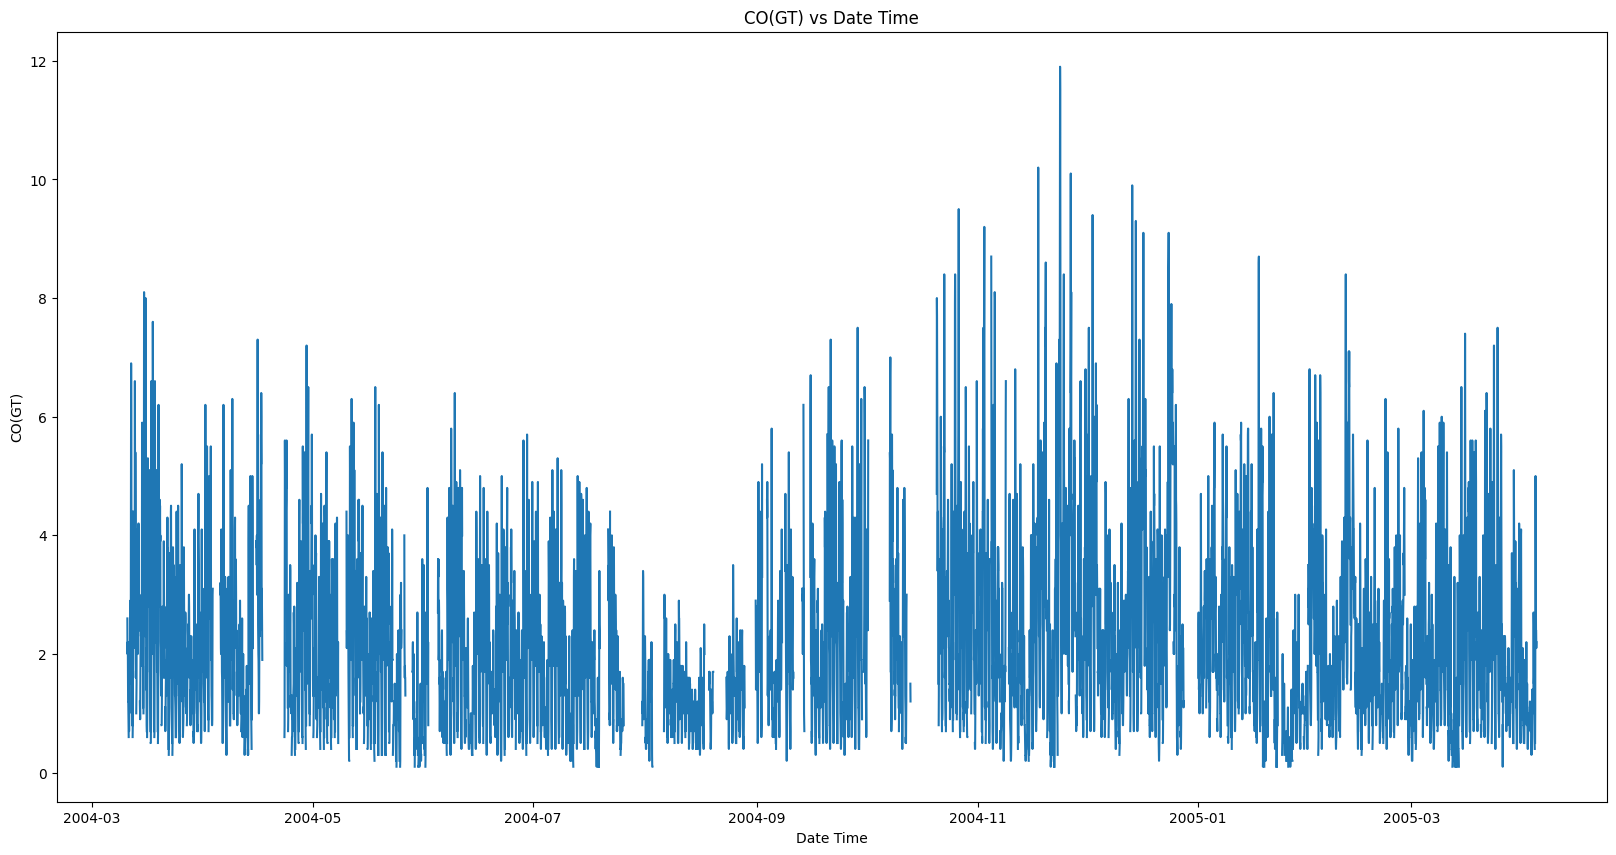

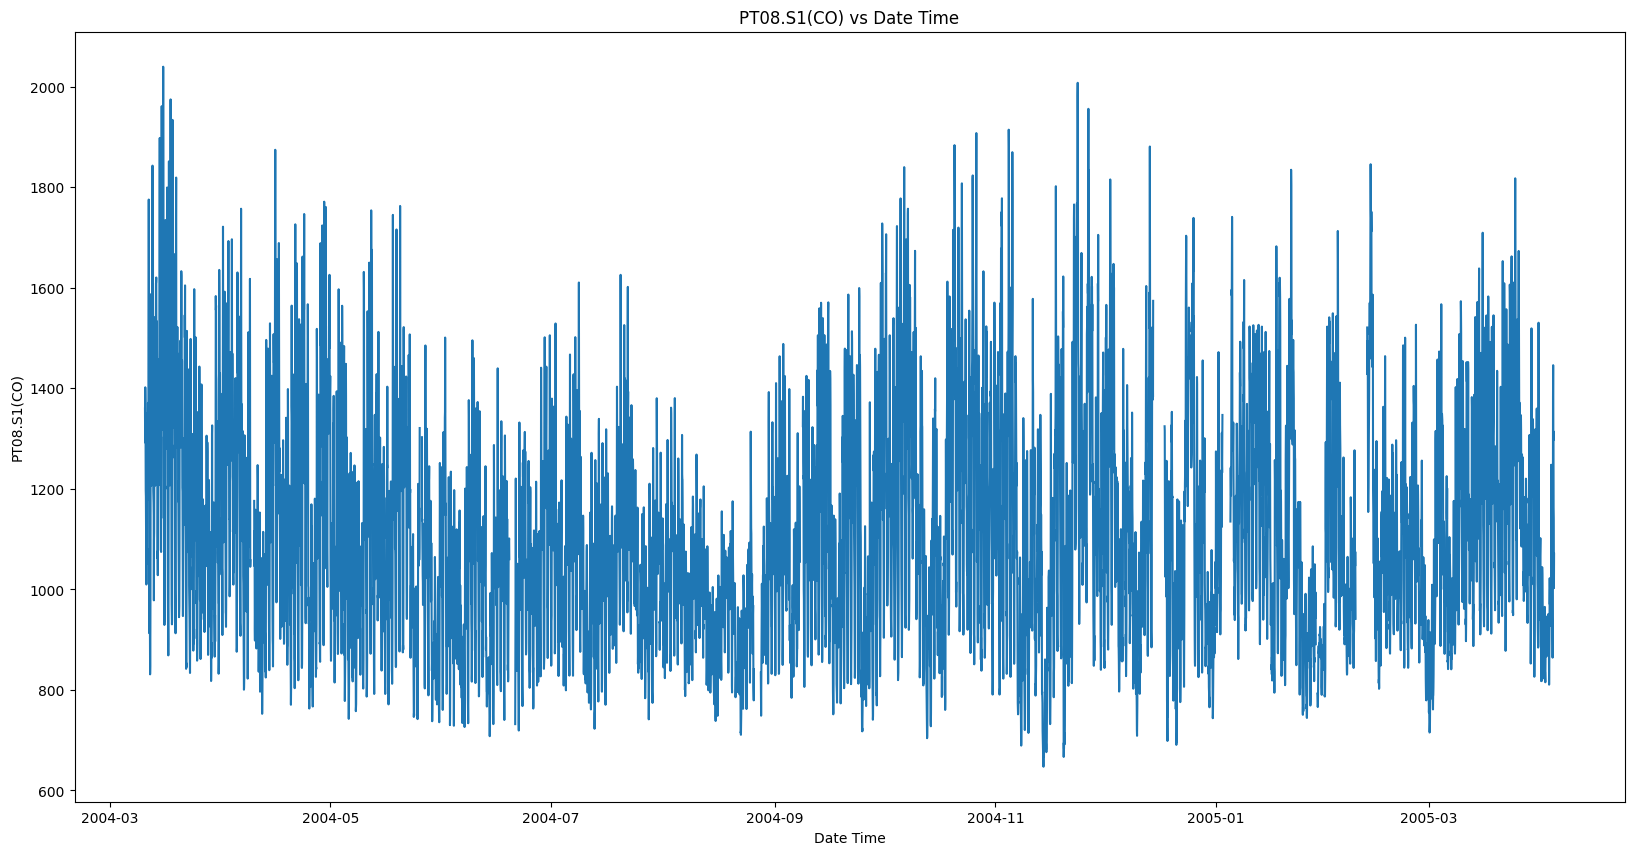

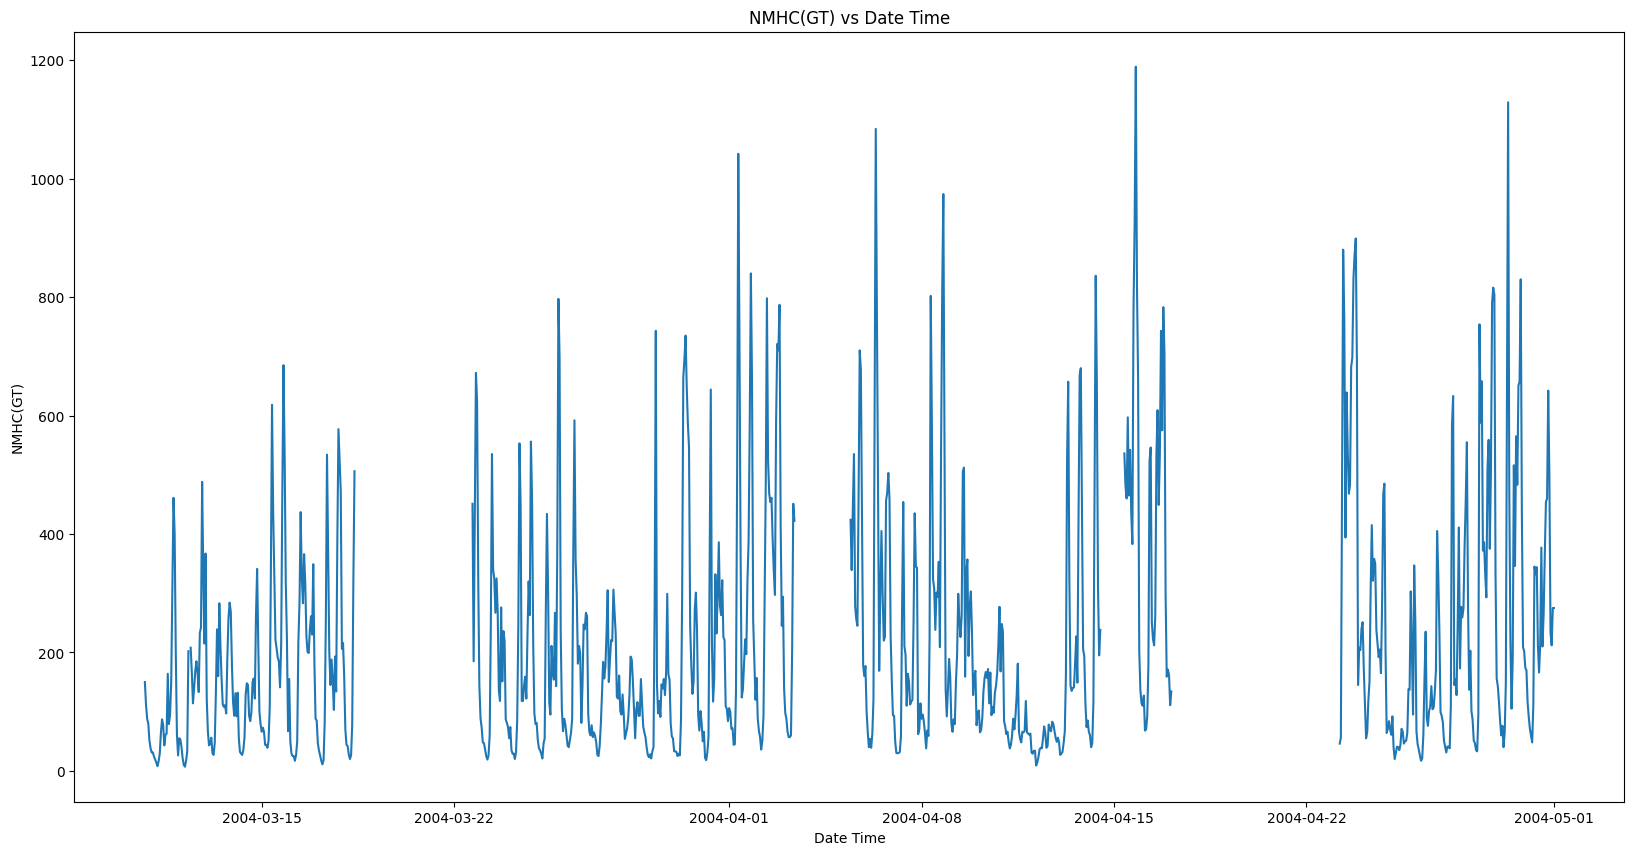

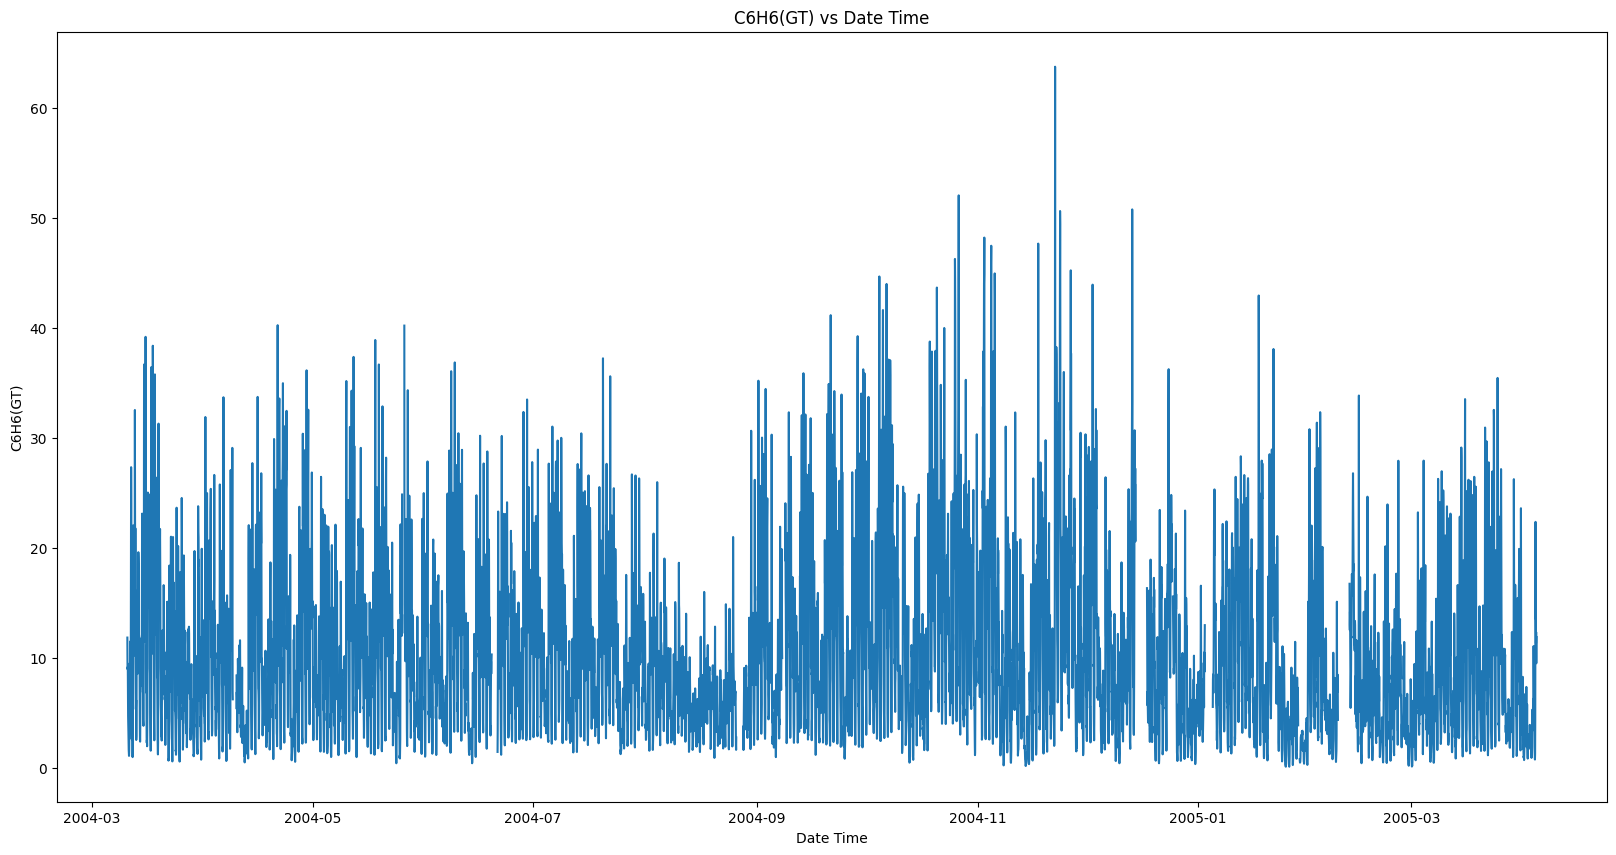

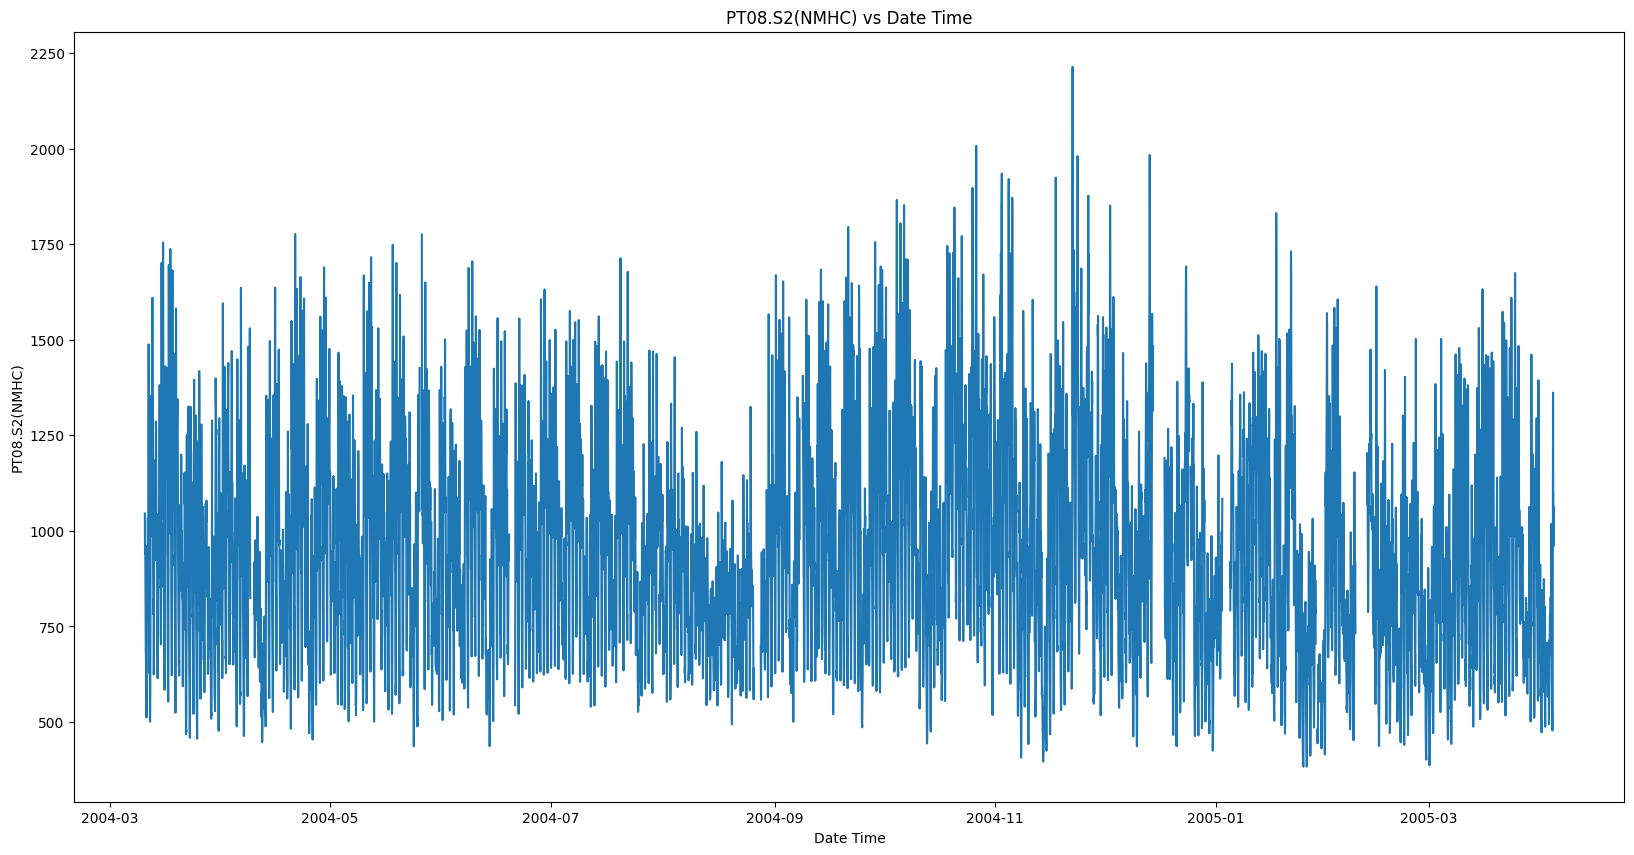

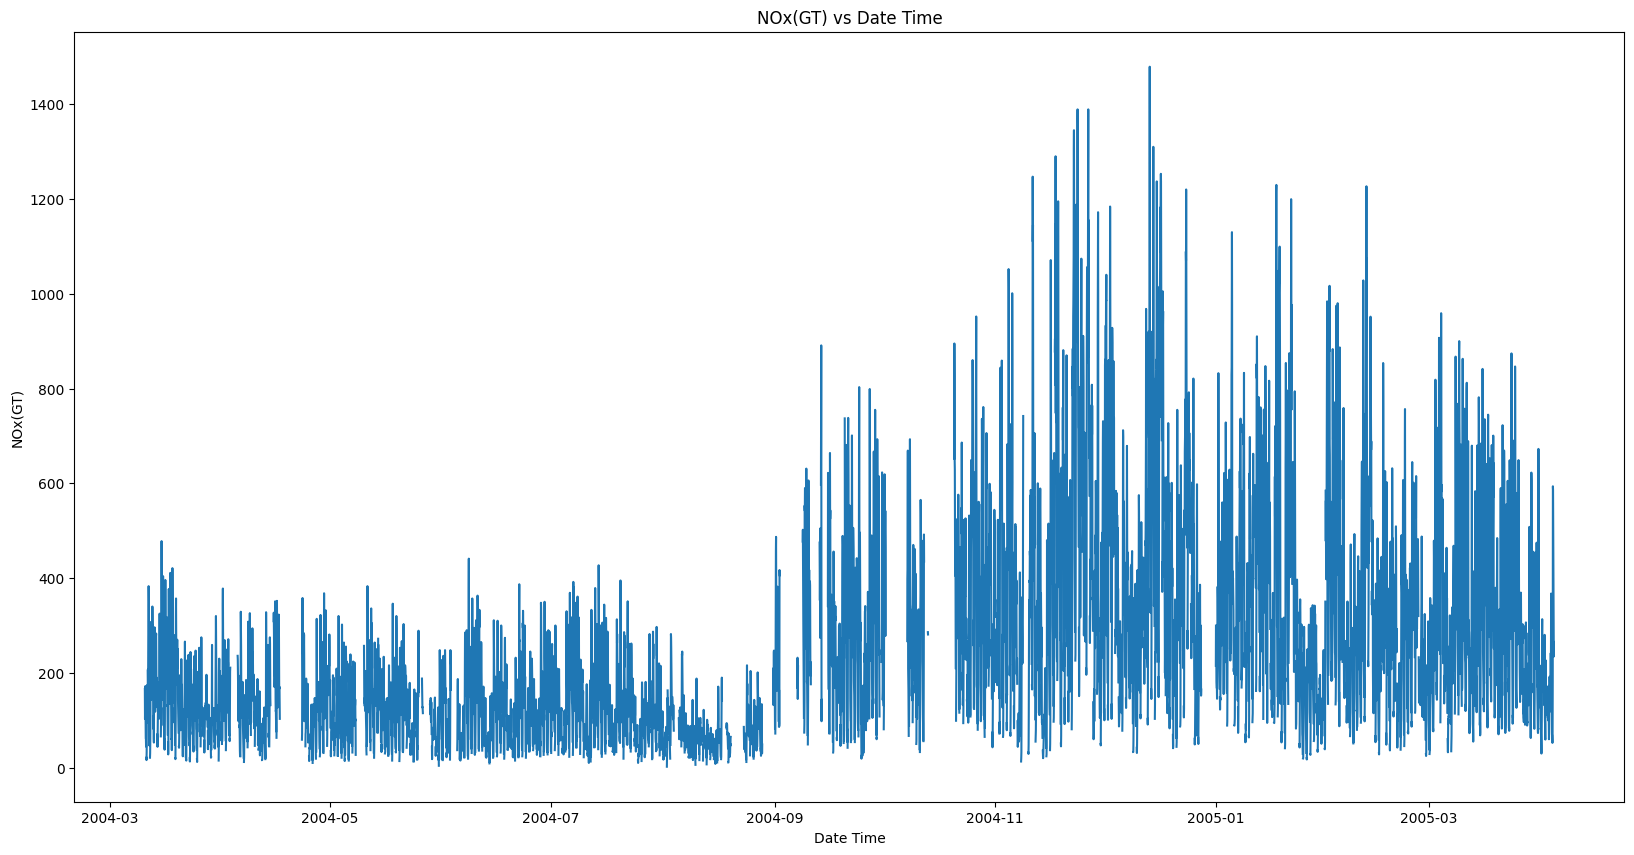

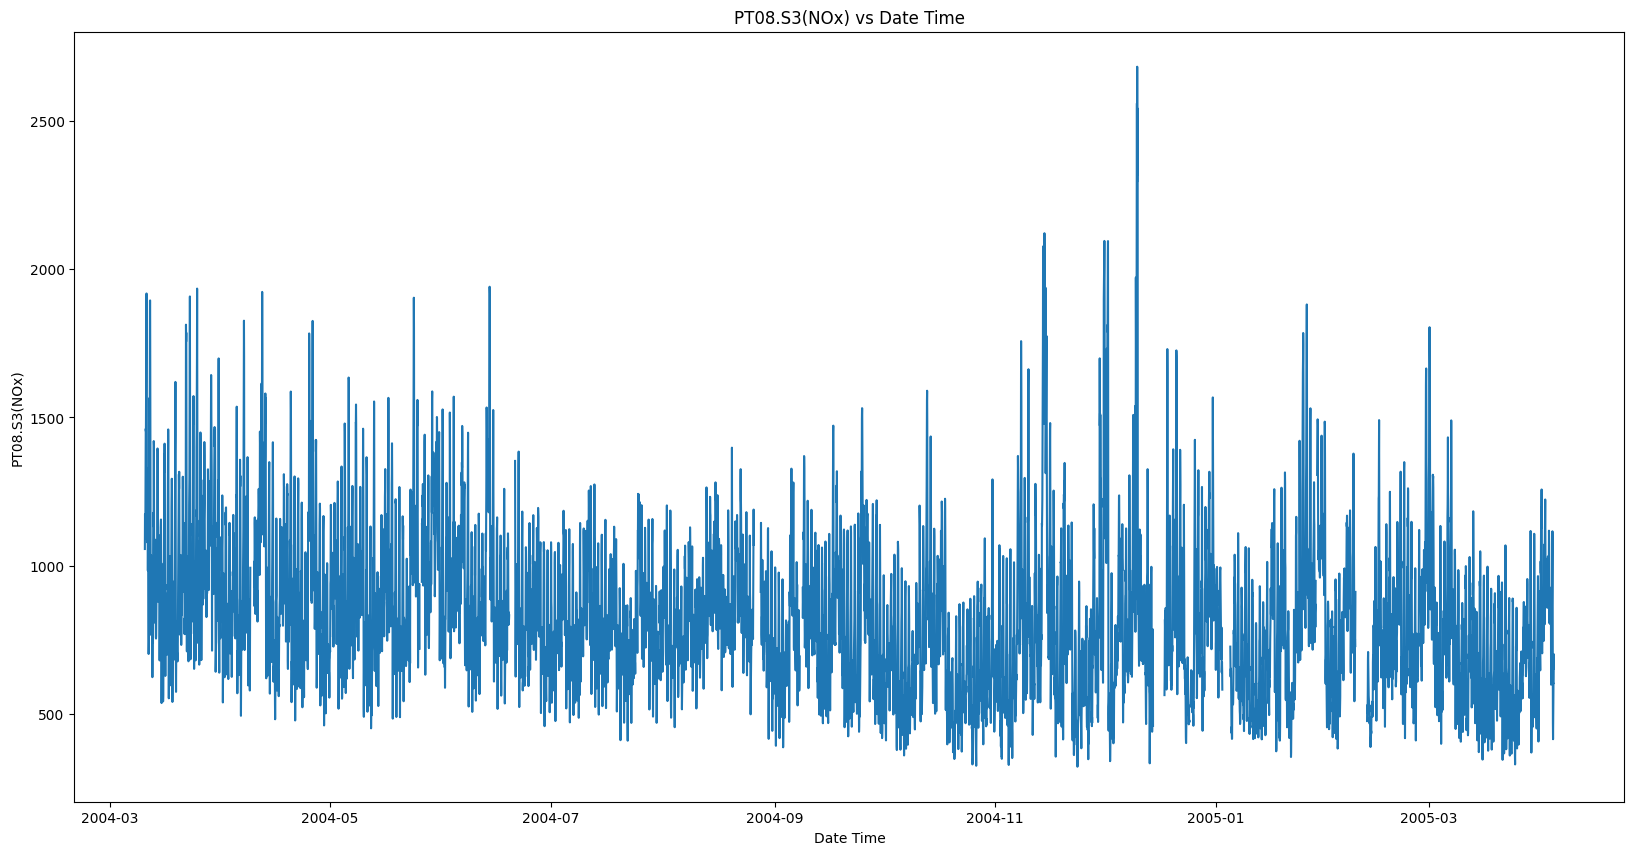

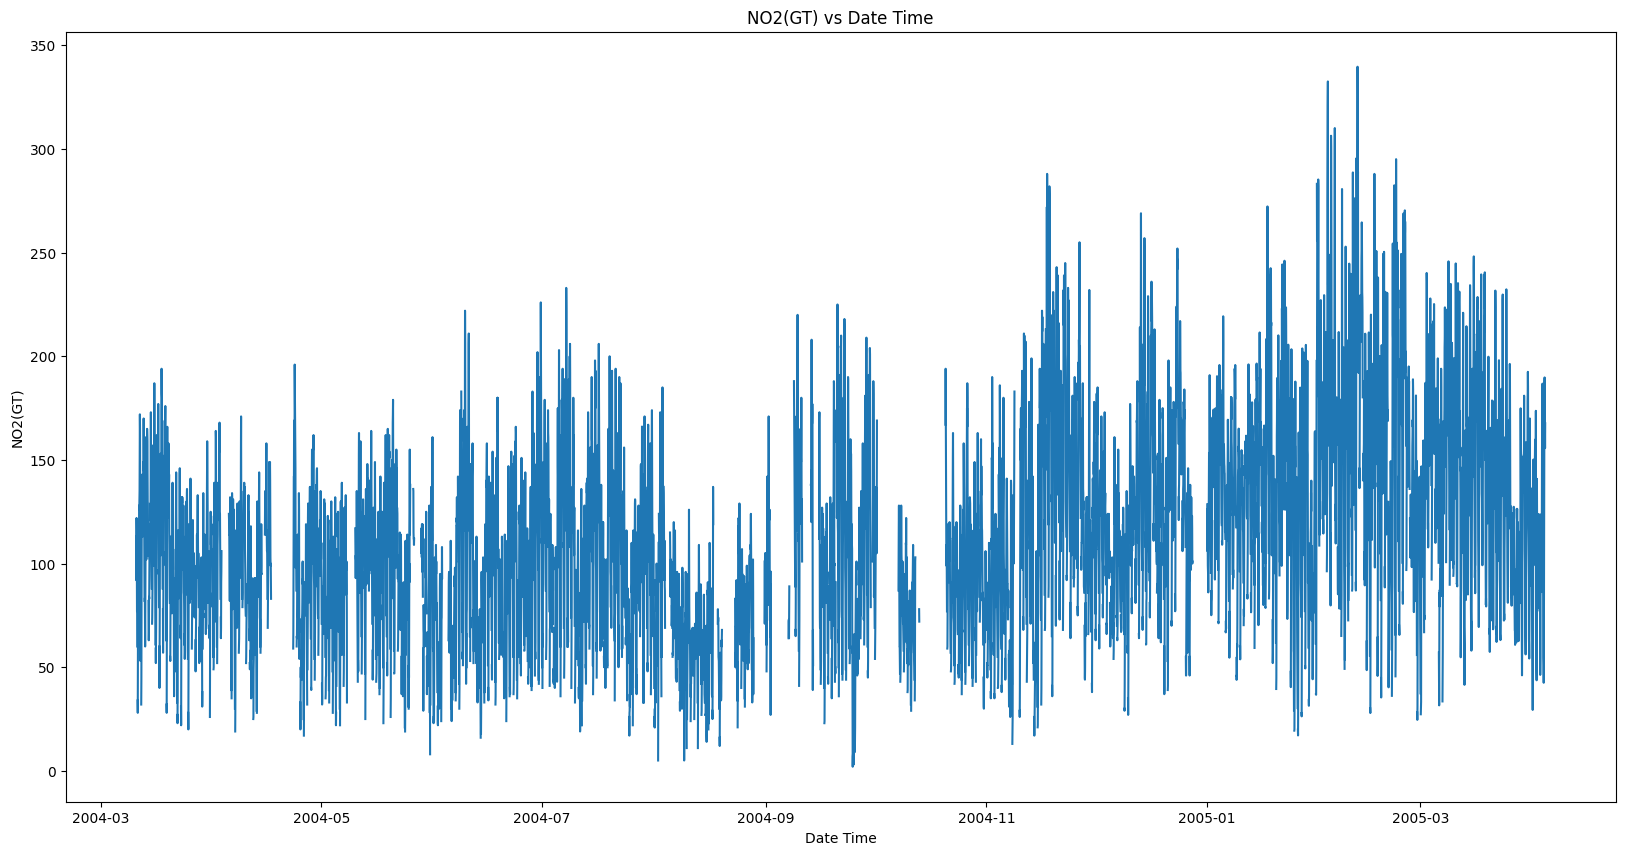

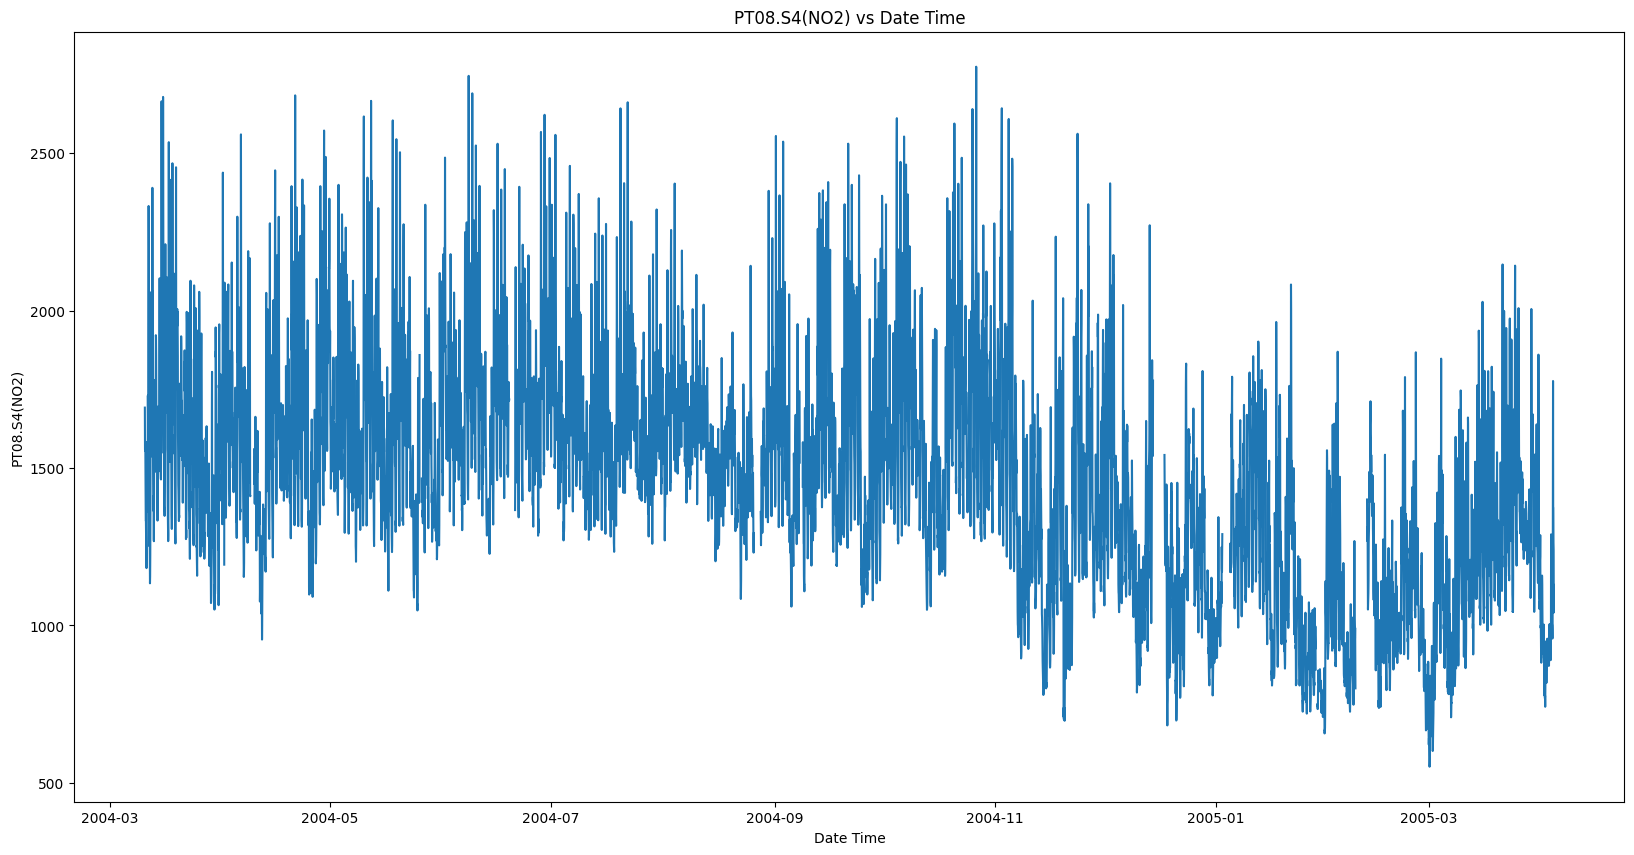

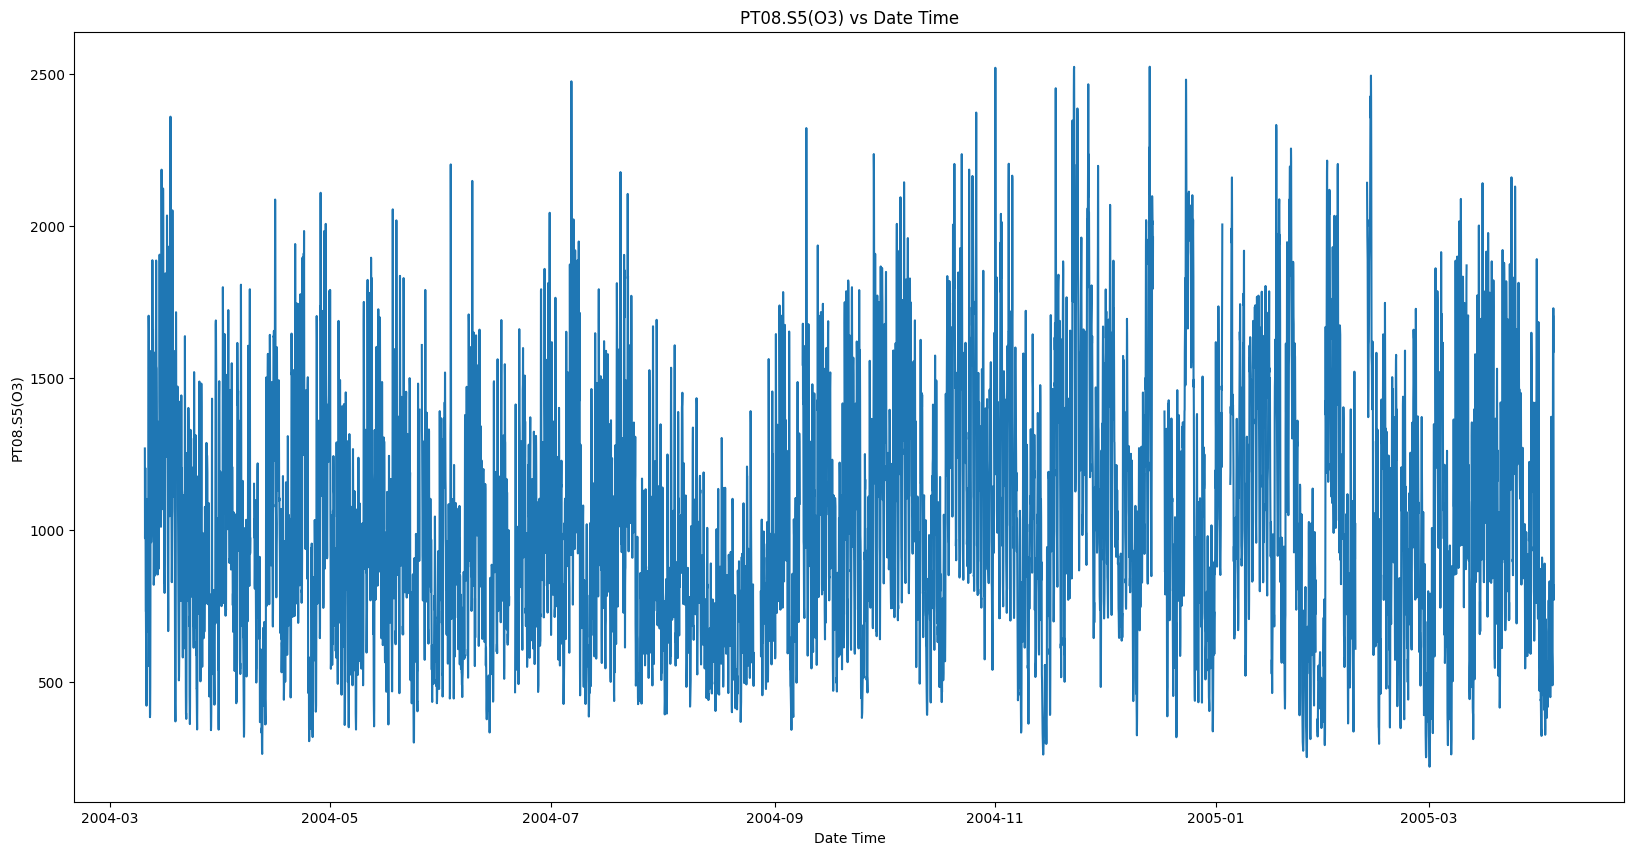

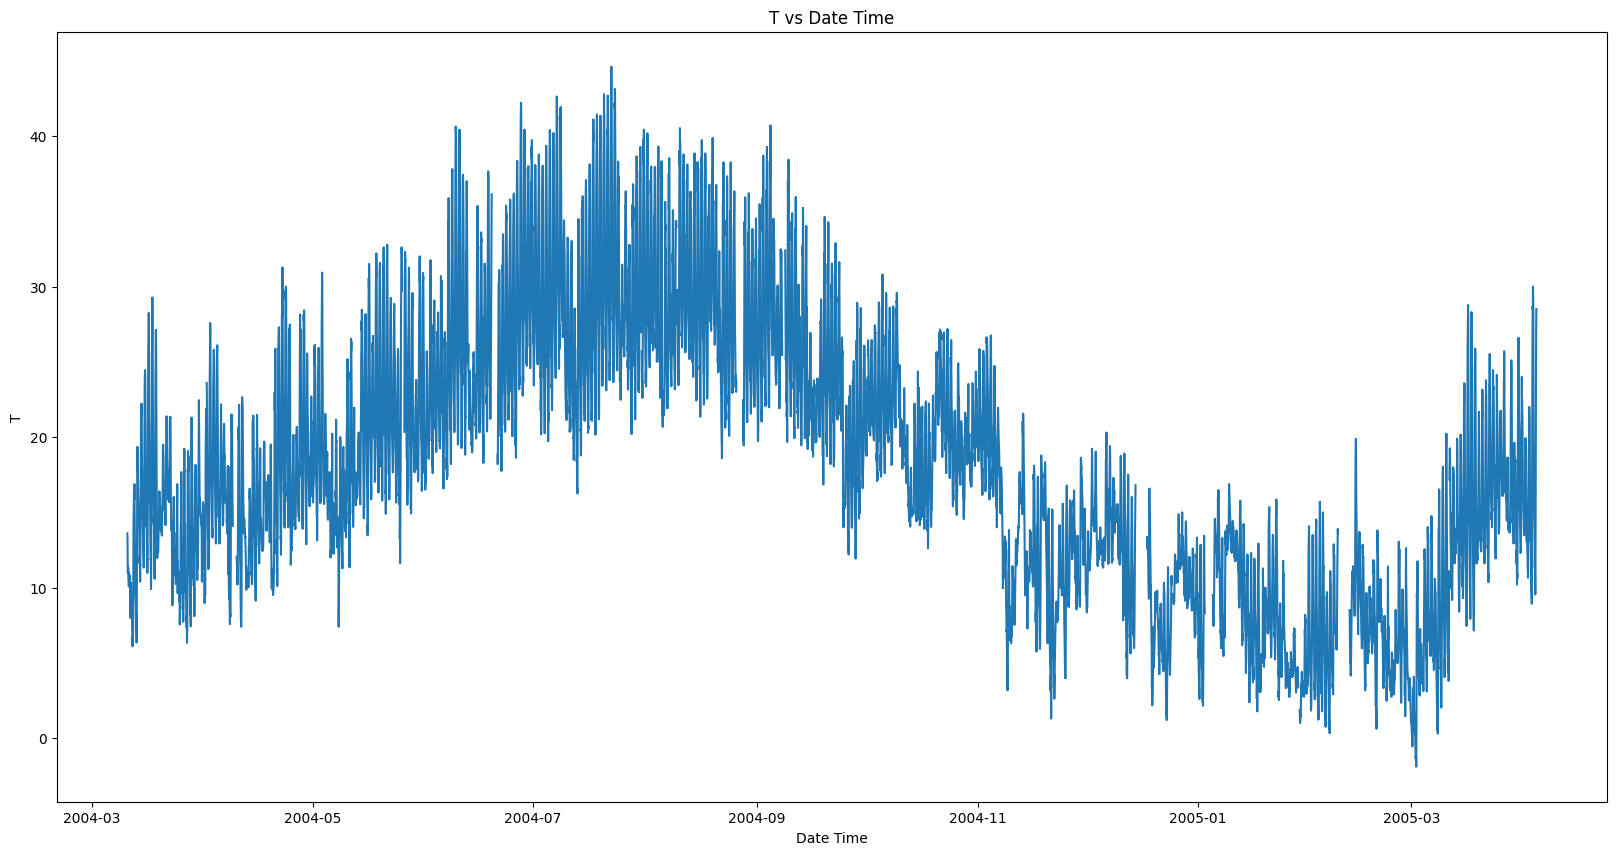

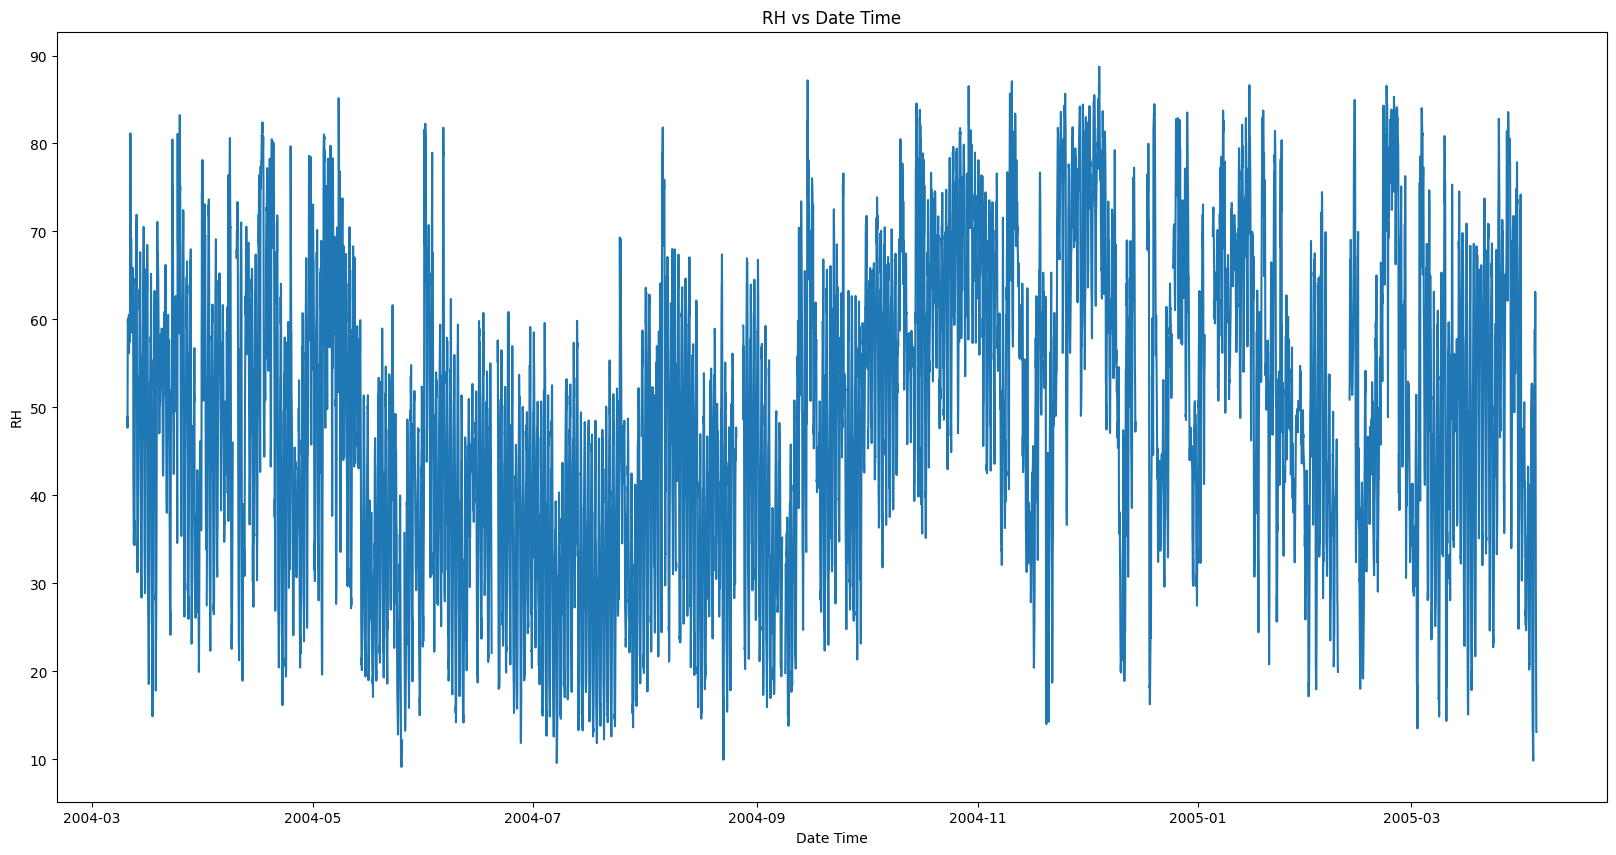

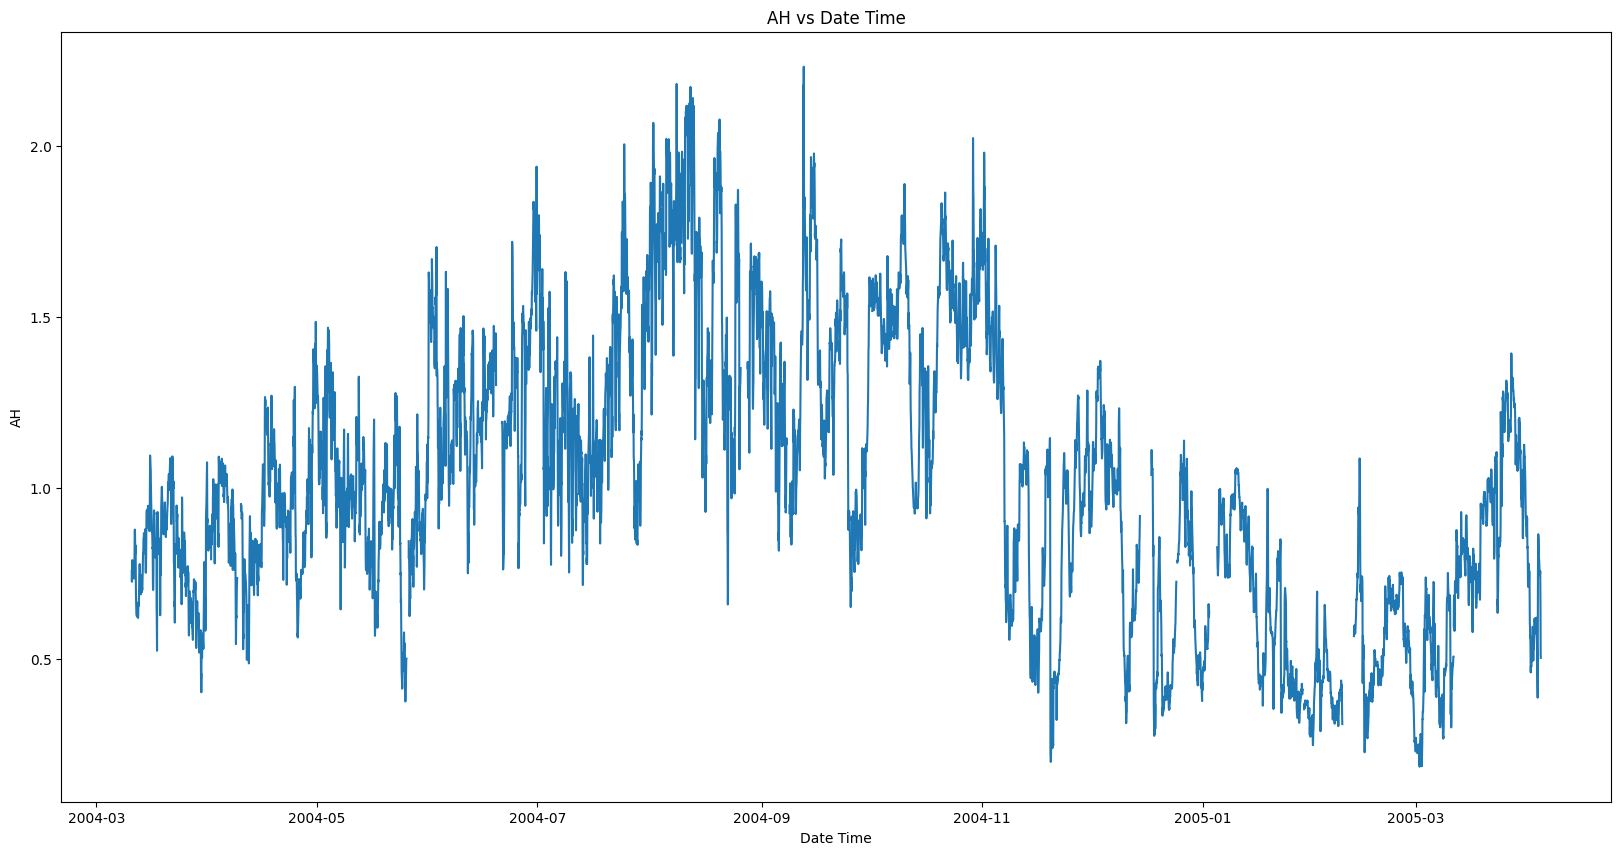

In [49]:
# draw separate plots for each column other than date time
for col in df.columns:
    if (col != 'DateTime' and col != 'Date' and col != 'Time'):
        plt.figure(figsize=(20,10))
        plt.plot(df['DateTime'], df[col])
        plt.xlabel('Date Time')
        plt.ylabel(col)
        plt.title(f'{col} vs Date Time')
        plt.show()

In [50]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime'],
      dtype='object')

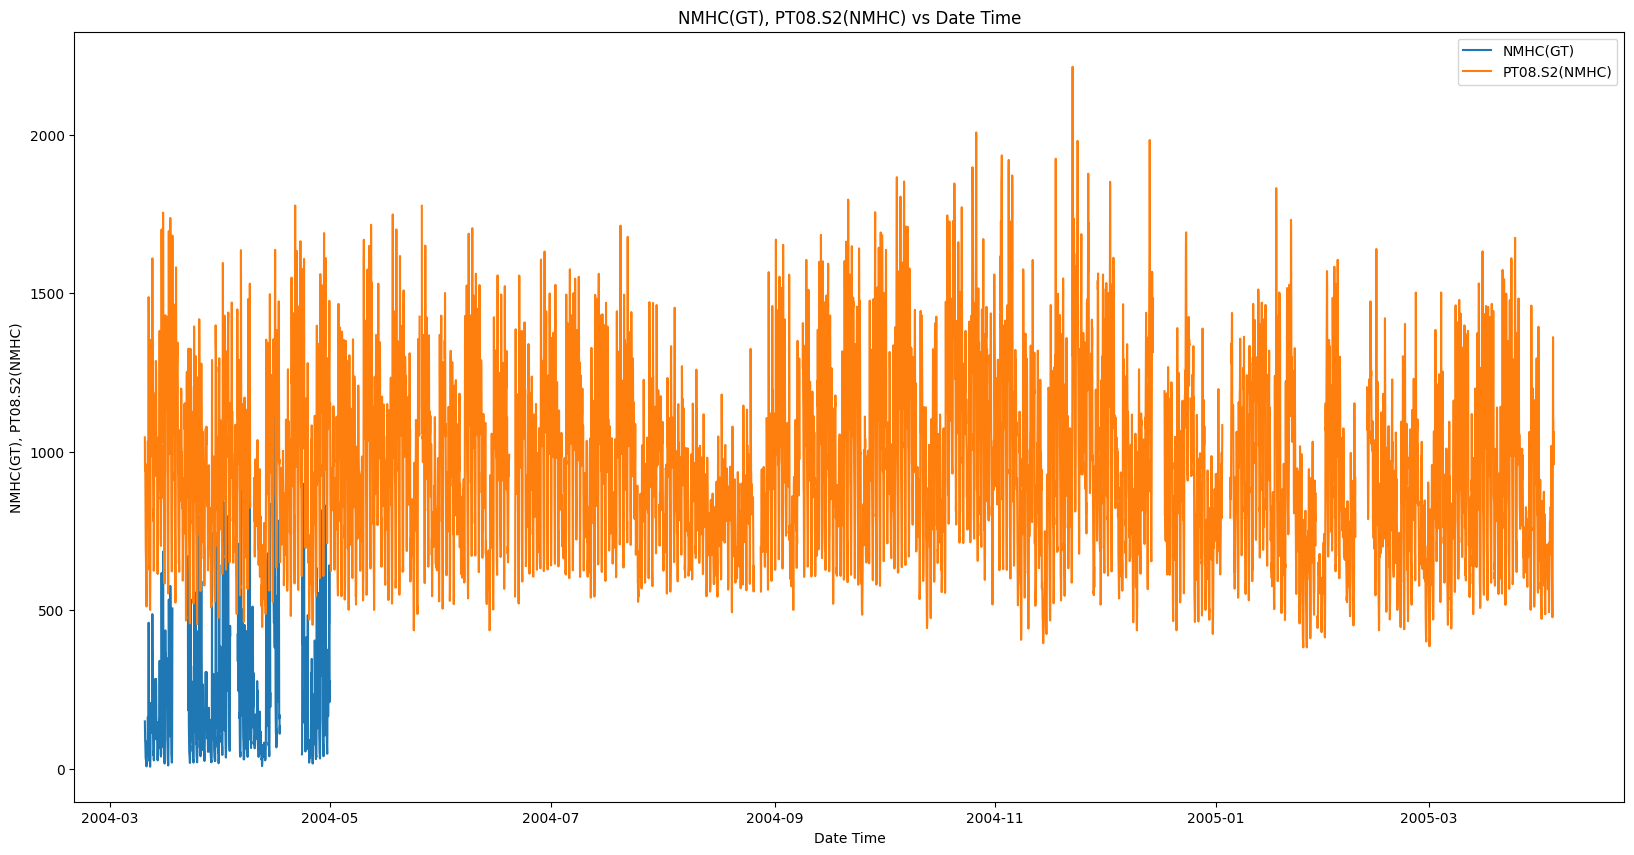

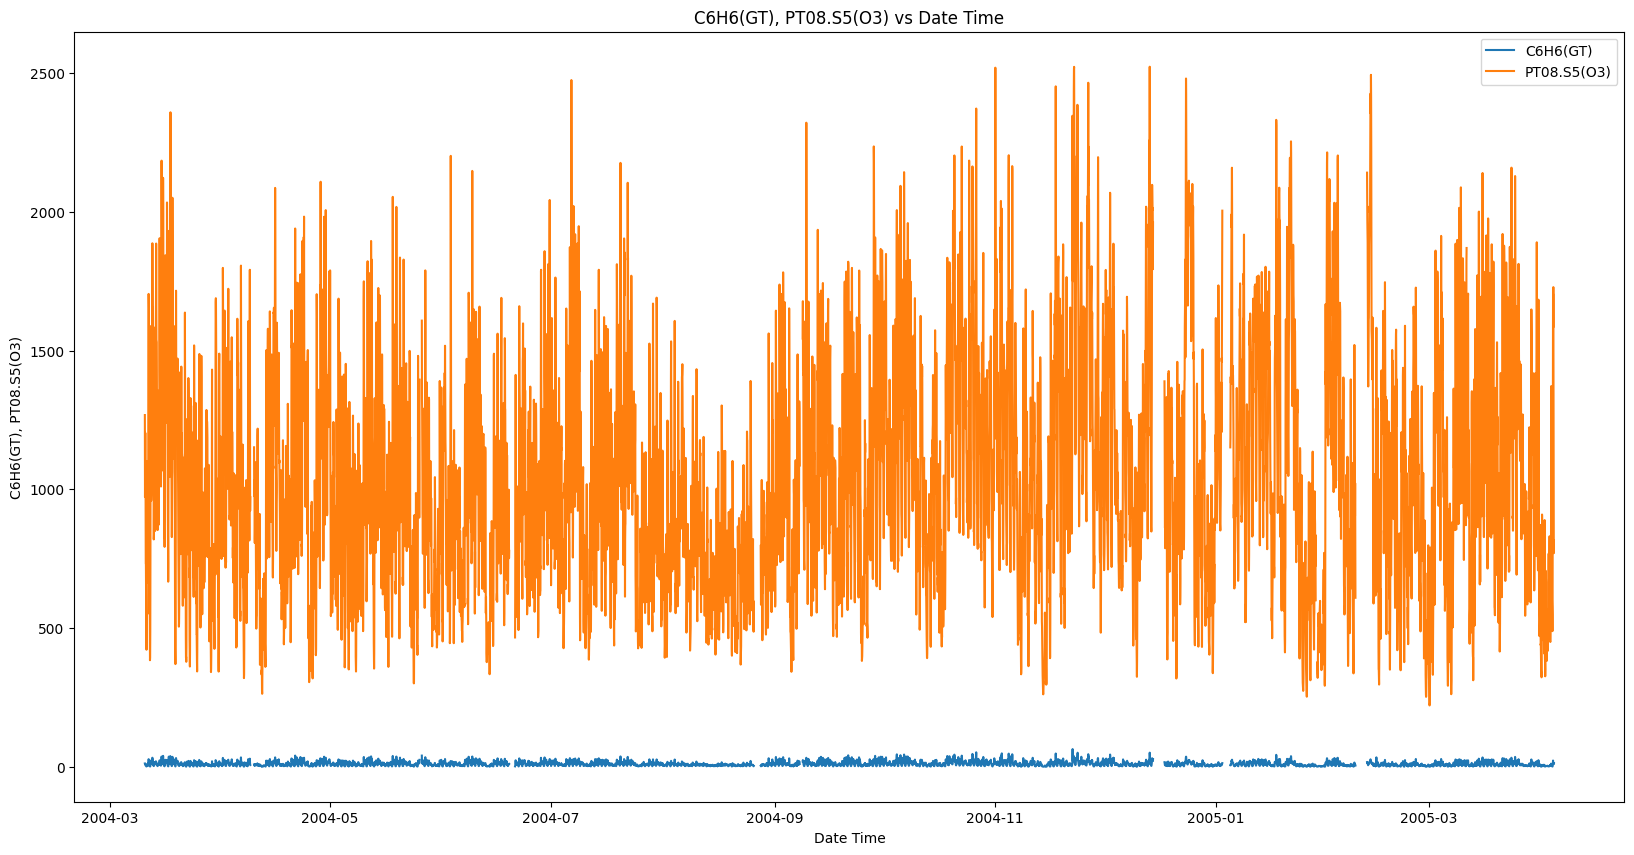

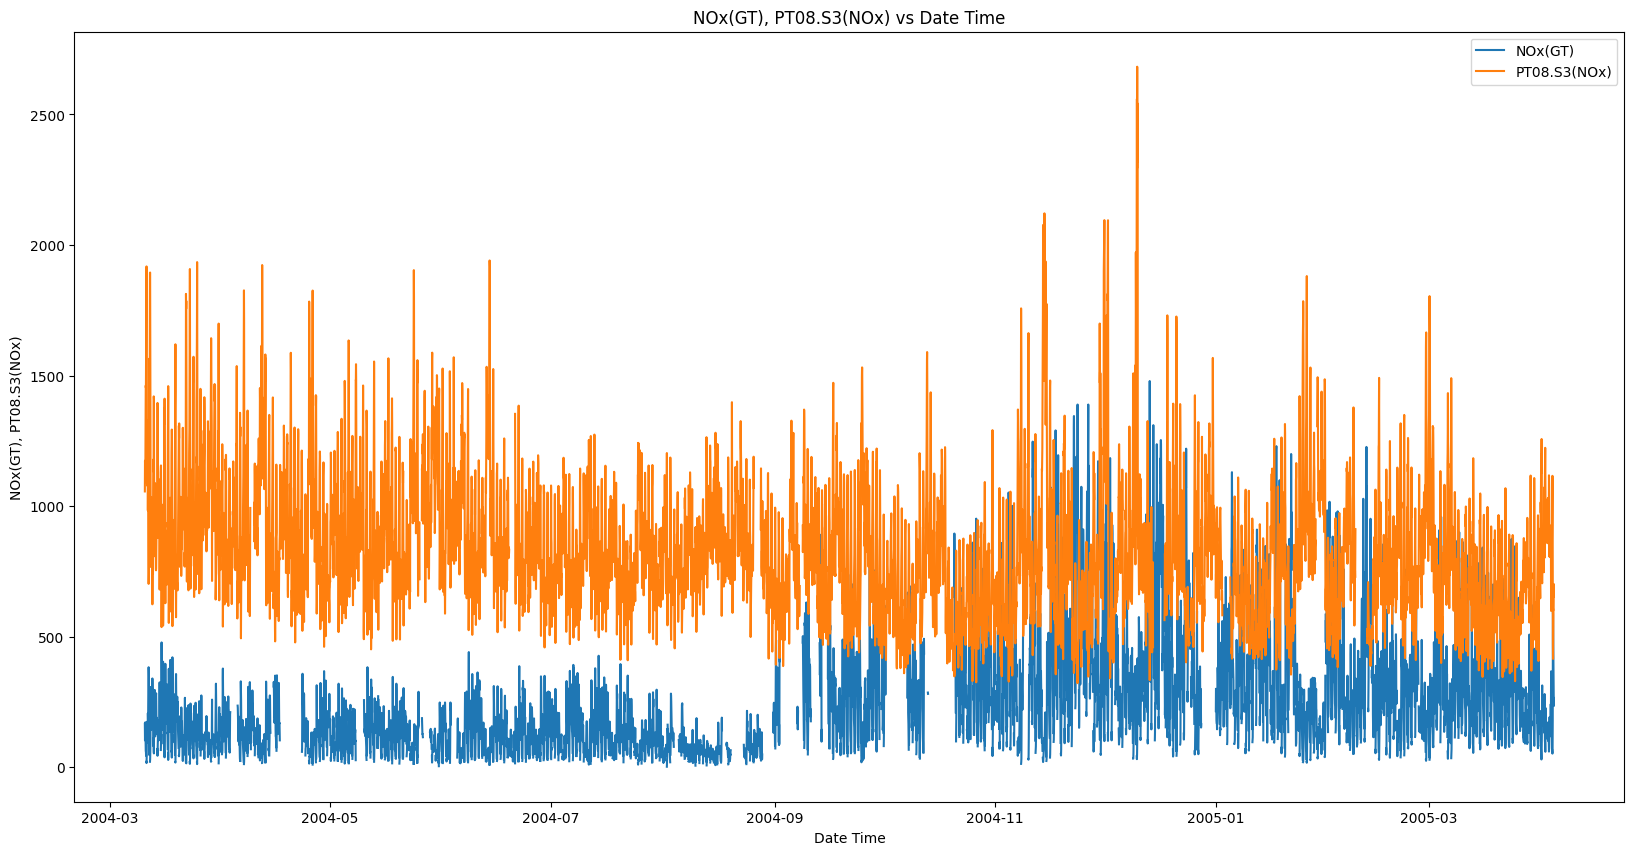

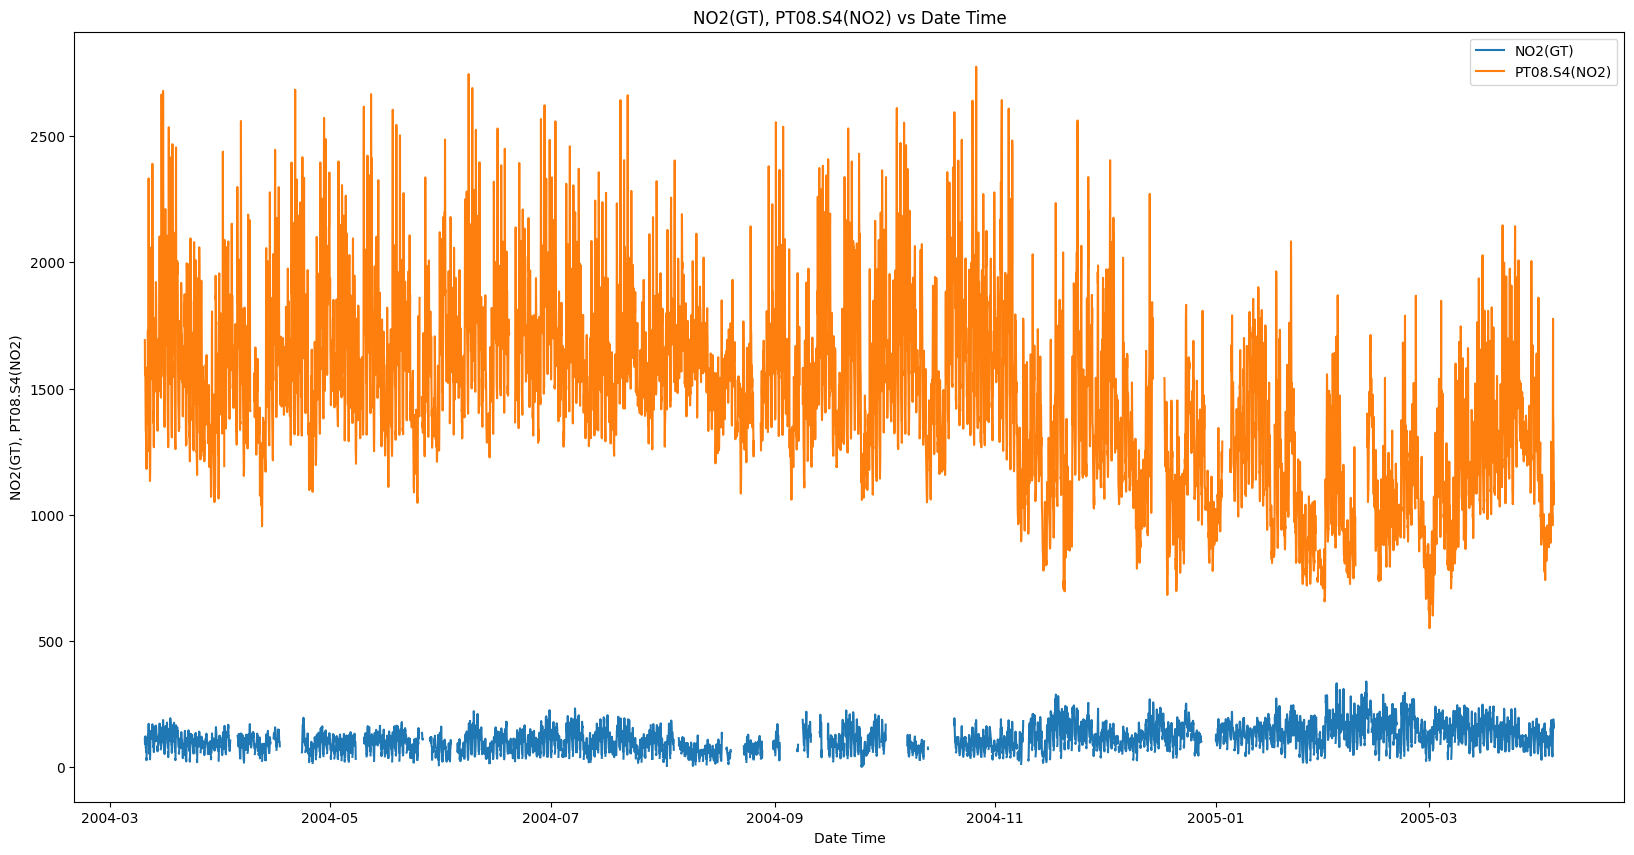

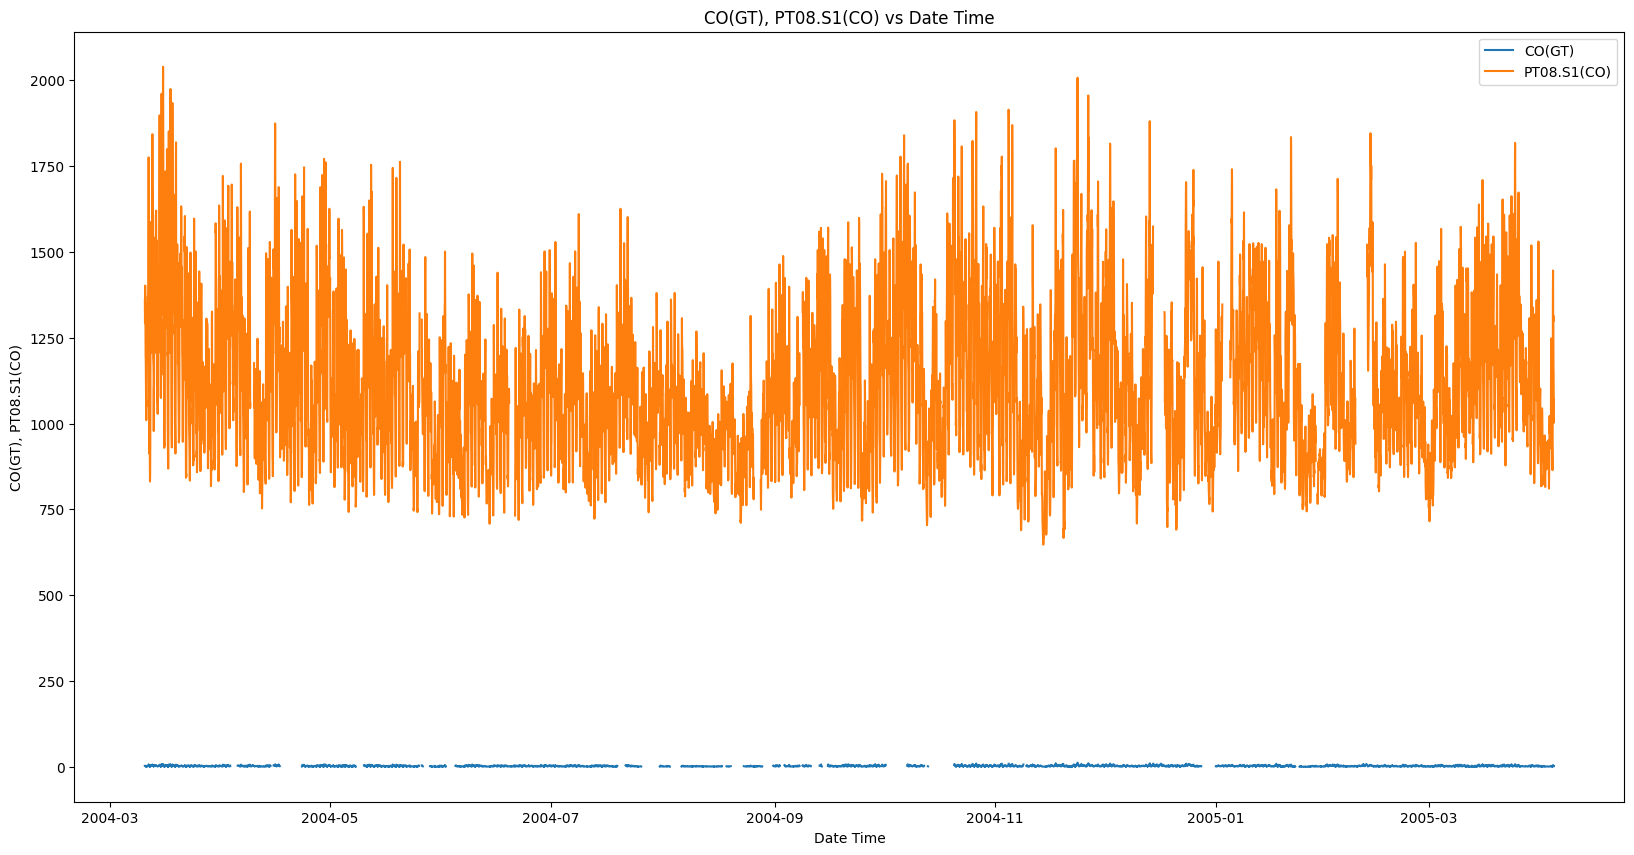

In [51]:
# draw how each sensor reading, gt varies with date time. draw separate plots for each sensor. below is the sensor, gt combinations
# 'NMHC(GT)'- 'PT08.S2(NMHC)'
# 'C6H6(GT)'- 'PT08.S5(O3)',
# 'NOx(GT)'- 'PT08.S3(NOx)',
# 'NO2(GT)'- 'PT08.S4(NO2)',
# 'CO(GT)'- 'PT08.S1(CO)'
# give me code

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NMHC(GT)'], label='NMHC(GT)')
plt.plot(df['DateTime'], df['PT08.S2(NMHC)'], label='PT08.S2(NMHC)')
plt.xlabel('Date Time')
plt.ylabel('NMHC(GT), PT08.S2(NMHC)')
plt.title('NMHC(GT), PT08.S2(NMHC) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['C6H6(GT)'], label='C6H6(GT)')
plt.plot(df['DateTime'], df['PT08.S5(O3)'], label='PT08.S5(O3)')
plt.xlabel('Date Time')
plt.ylabel('C6H6(GT), PT08.S5(O3)')
plt.title('C6H6(GT), PT08.S5(O3) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NOx(GT)'], label='NOx(GT)')
plt.plot(df['DateTime'], df['PT08.S3(NOx)'], label='PT08.S3(NOx)')
plt.xlabel('Date Time')
plt.ylabel('NOx(GT), PT08.S3(NOx)')
plt.title('NOx(GT), PT08.S3(NOx) vs Date Time')
plt.legend()    
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NO2(GT)'], label='NO2(GT)')
plt.plot(df['DateTime'], df['PT08.S4(NO2)'], label='PT08.S4(NO2)')
plt.xlabel('Date Time')
plt.ylabel('NO2(GT), PT08.S4(NO2)')
plt.title('NO2(GT), PT08.S4(NO2) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['CO(GT)'], label='CO(GT)')
plt.plot(df['DateTime'], df['PT08.S1(CO)'], label='PT08.S1(CO)')
plt.xlabel('Date Time')
plt.ylabel('CO(GT), PT08.S1(CO)')
plt.title('CO(GT), PT08.S1(CO) vs Date Time')
plt.legend()
plt.show()


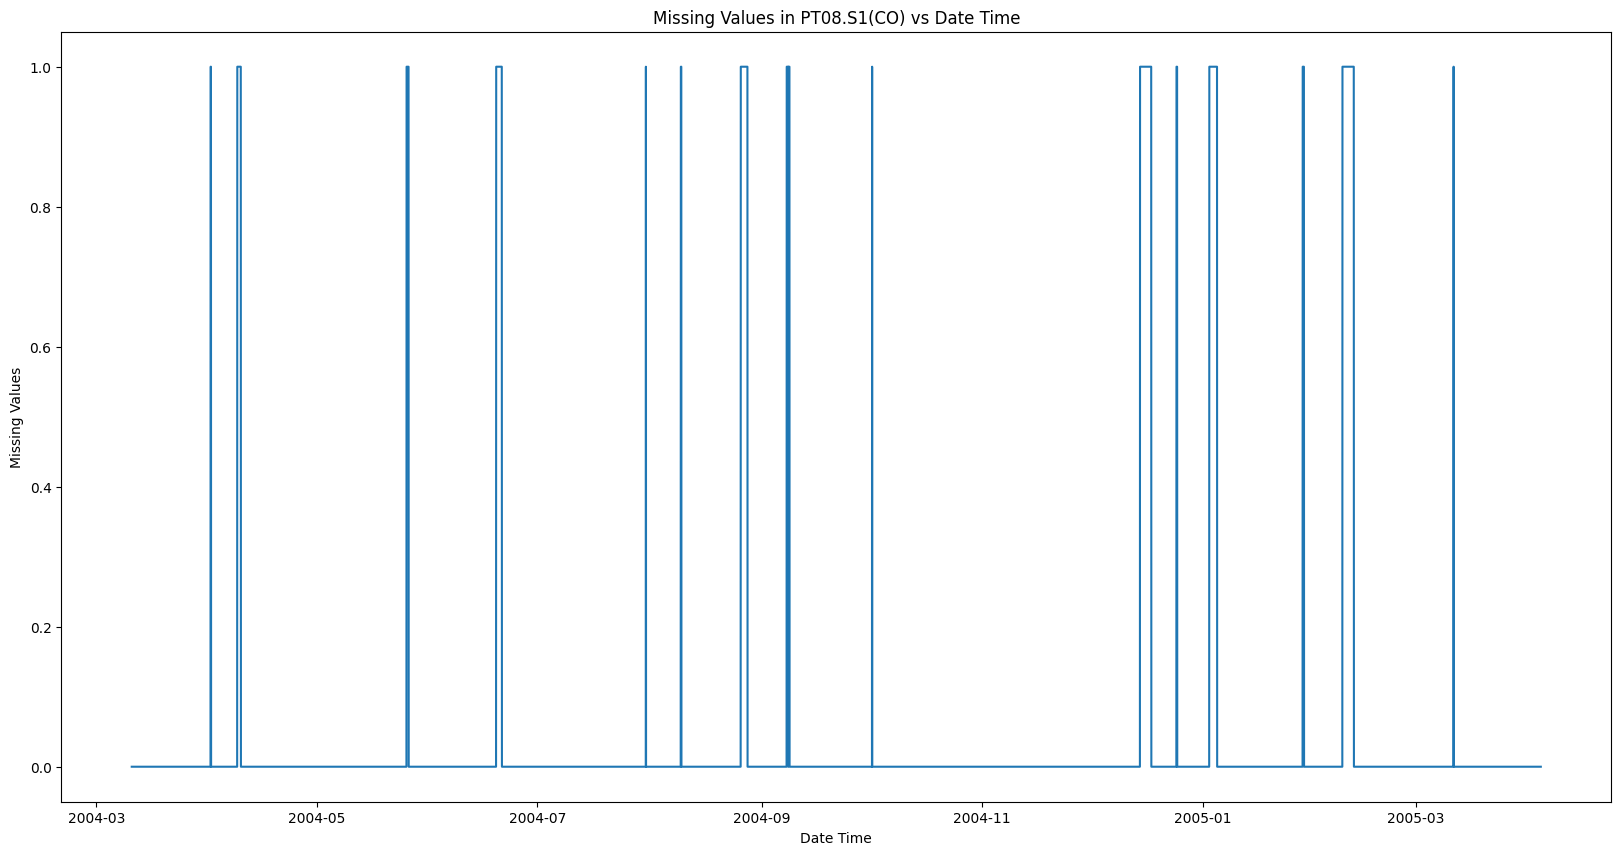

In [52]:
# plot the date time with missing values in PT08.S1(CO) column
plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['PT08.S1(CO)'].isnull())
plt.xlabel('Date Time')
plt.ylabel('Missing Values')
plt.title('Missing Values in PT08.S1(CO) vs Date Time')
plt.show()

In [53]:
# list the unique date with missing values in PT08.S1(CO) column
df[df['PT08.S1(CO)'].isnull()]['Date'].unique()

<DatetimeArray>
['2004-04-01 00:00:00', '2004-04-08 00:00:00', '2004-04-09 00:00:00',
 '2004-05-25 00:00:00', '2004-05-26 00:00:00', '2004-06-19 00:00:00',
 '2004-06-20 00:00:00', '2004-06-21 00:00:00', '2004-07-31 00:00:00',
 '2004-08-09 00:00:00', '2004-08-26 00:00:00', '2004-08-27 00:00:00',
 '2004-08-28 00:00:00', '2004-09-07 00:00:00', '2004-09-08 00:00:00',
 '2004-10-01 00:00:00', '2004-12-14 00:00:00', '2004-12-15 00:00:00',
 '2004-12-16 00:00:00', '2004-12-17 00:00:00', '2004-12-24 00:00:00',
 '2005-01-02 00:00:00', '2005-01-03 00:00:00', '2005-01-04 00:00:00',
 '2005-01-05 00:00:00', '2005-01-28 00:00:00', '2005-01-29 00:00:00',
 '2005-02-08 00:00:00', '2005-02-09 00:00:00', '2005-02-10 00:00:00',
 '2005-02-11 00:00:00', '2005-03-11 00:00:00']
Length: 32, dtype: datetime64[ns]

In [54]:
# forrward fill the missing values in all columns
df = df.fillna(method='ffill')
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12048\982919740.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64

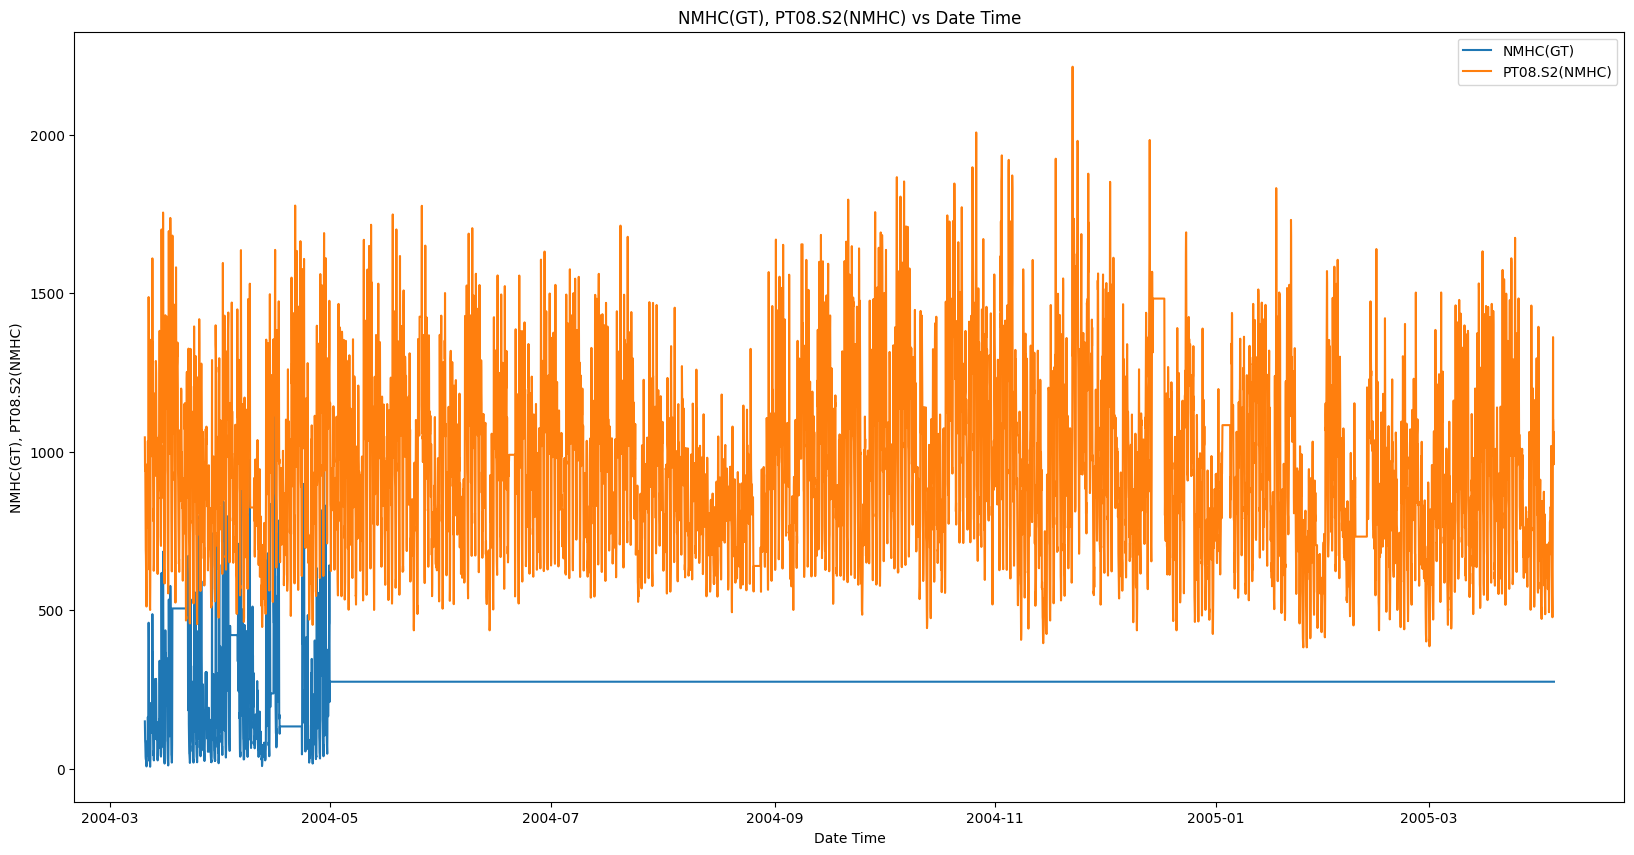

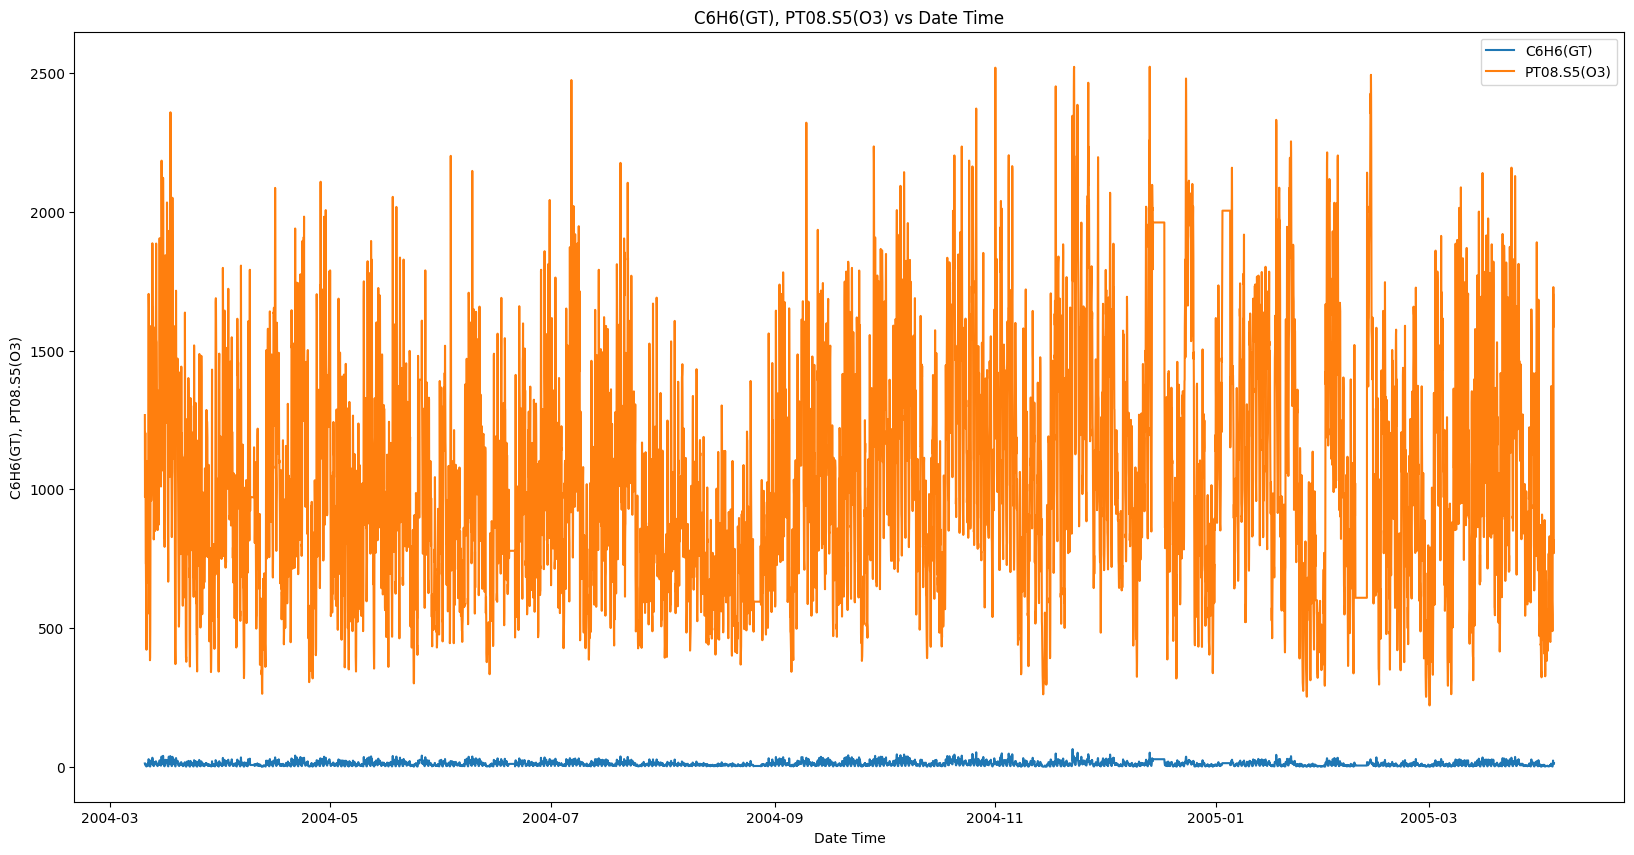

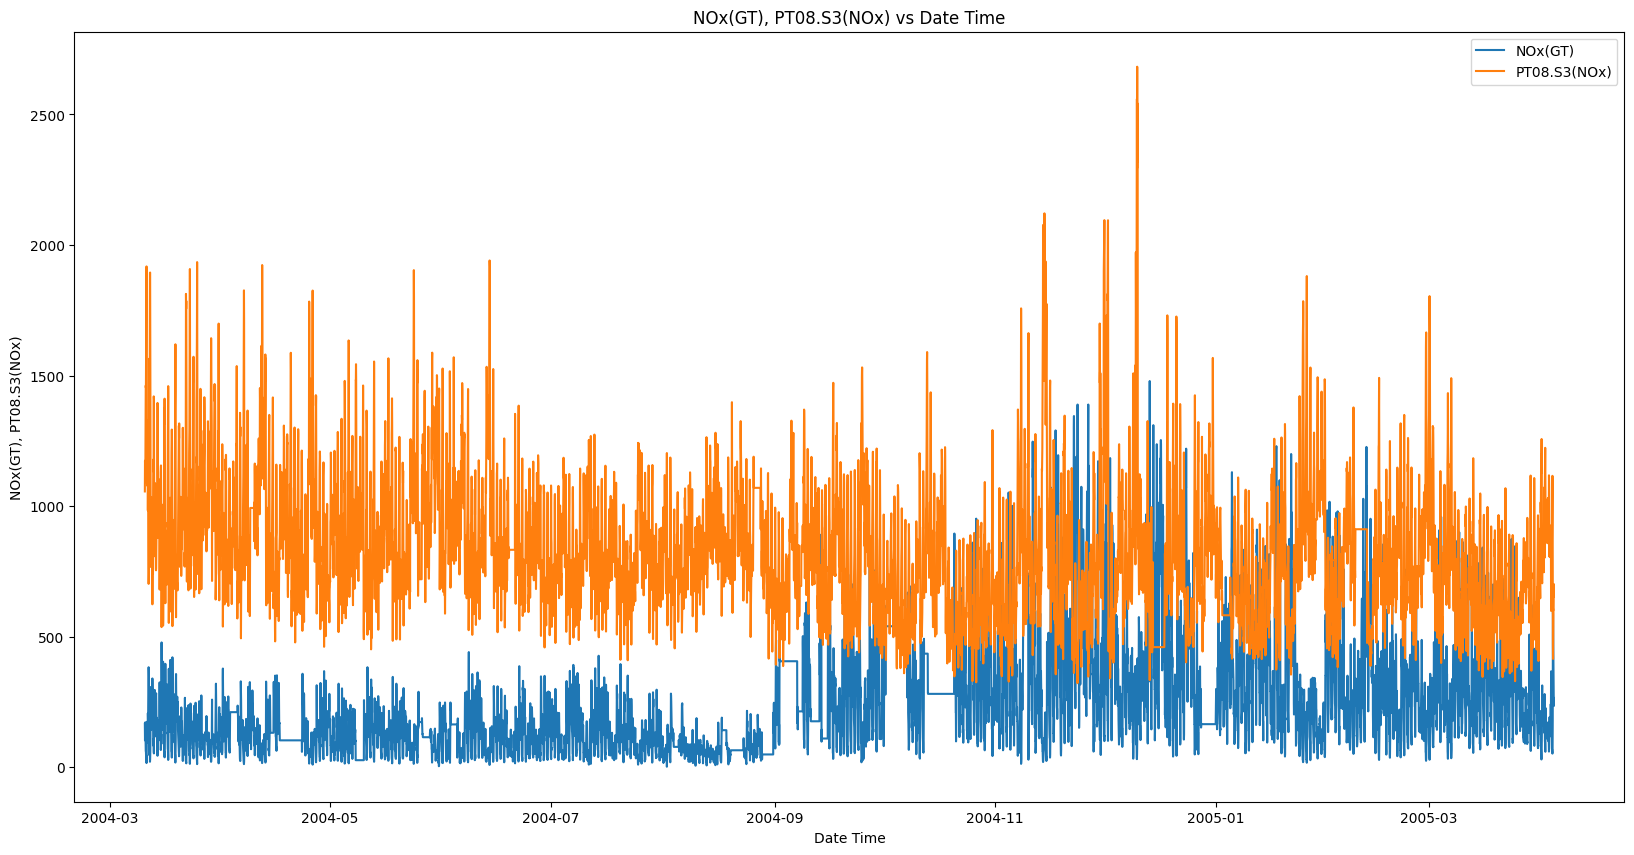

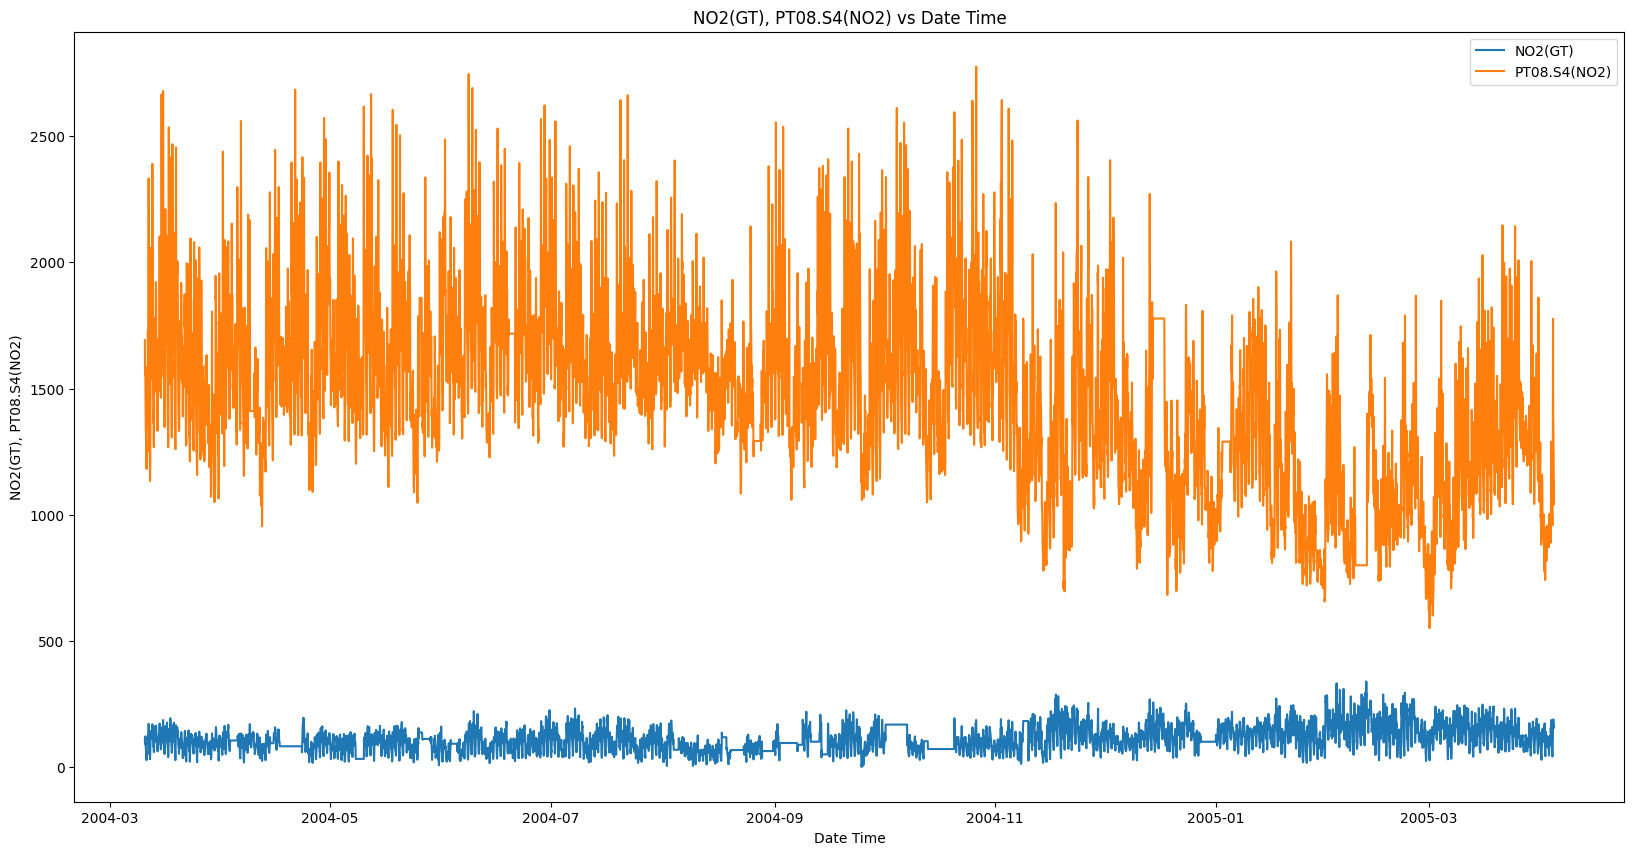

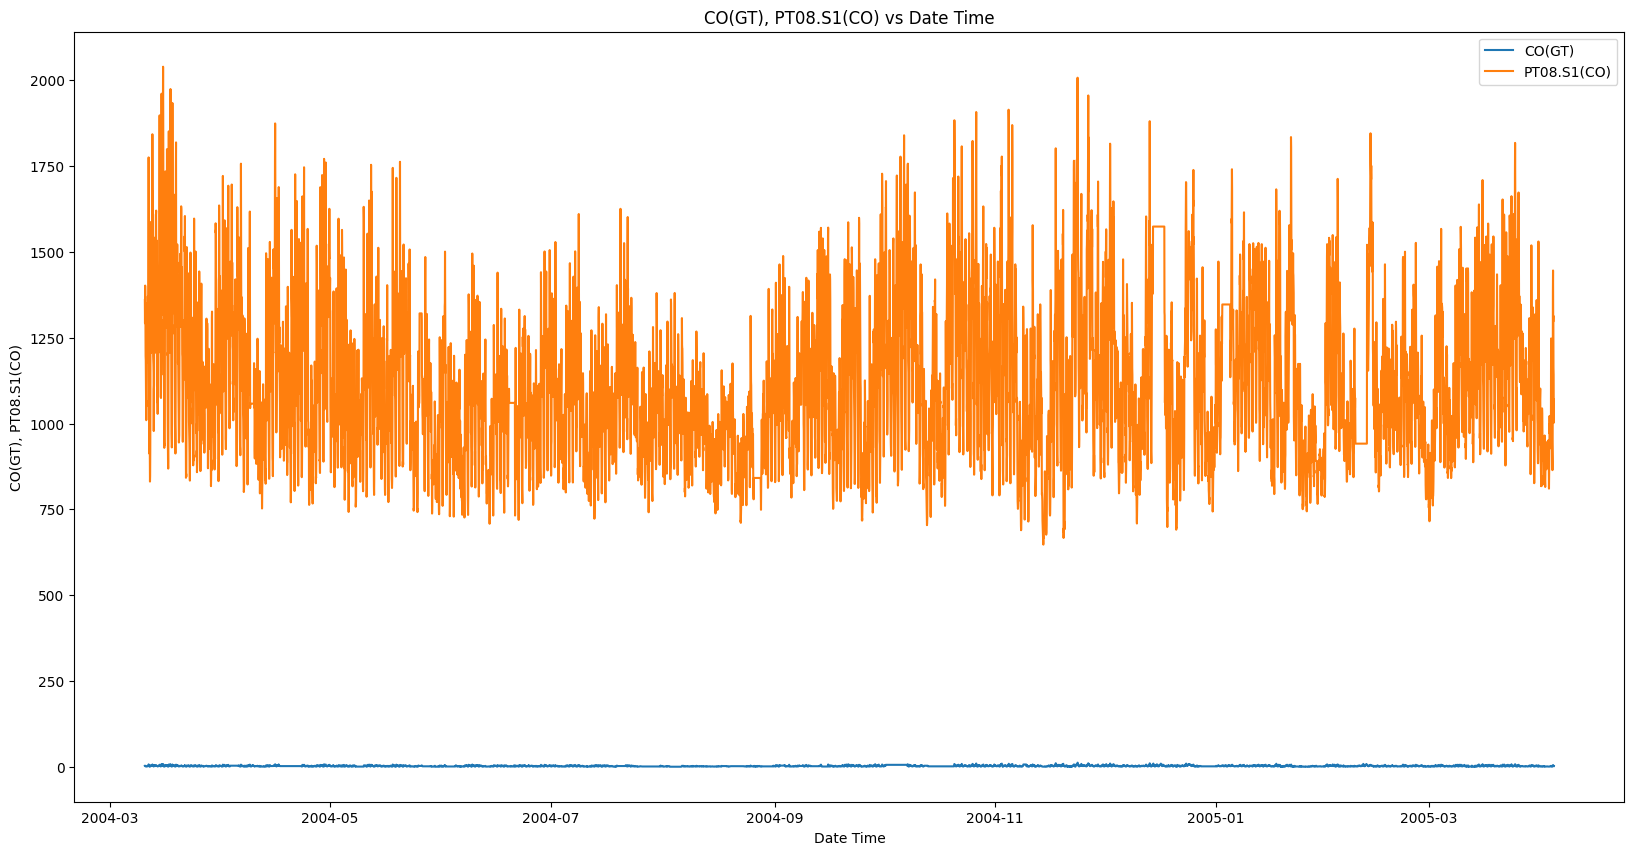

In [55]:
# draw how each sensor reading, gt varies with date time. draw separate plots for each sensor. below is the sensor, gt combinations
# 'NMHC(GT)'- 'PT08.S2(NMHC)'
# 'C6H6(GT)'- 'PT08.S5(O3)',
# 'NOx(GT)'- 'PT08.S3(NOx)',
# 'NO2(GT)'- 'PT08.S4(NO2)',
# 'CO(GT)'- 'PT08.S1(CO)'
# give me code

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NMHC(GT)'], label='NMHC(GT)')
plt.plot(df['DateTime'], df['PT08.S2(NMHC)'], label='PT08.S2(NMHC)')
plt.xlabel('Date Time')
plt.ylabel('NMHC(GT), PT08.S2(NMHC)')
plt.title('NMHC(GT), PT08.S2(NMHC) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['C6H6(GT)'], label='C6H6(GT)')
plt.plot(df['DateTime'], df['PT08.S5(O3)'], label='PT08.S5(O3)')
plt.xlabel('Date Time')
plt.ylabel('C6H6(GT), PT08.S5(O3)')
plt.title('C6H6(GT), PT08.S5(O3) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NOx(GT)'], label='NOx(GT)')
plt.plot(df['DateTime'], df['PT08.S3(NOx)'], label='PT08.S3(NOx)')
plt.xlabel('Date Time')
plt.ylabel('NOx(GT), PT08.S3(NOx)')
plt.title('NOx(GT), PT08.S3(NOx) vs Date Time')
plt.legend()    
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['NO2(GT)'], label='NO2(GT)')
plt.plot(df['DateTime'], df['PT08.S4(NO2)'], label='PT08.S4(NO2)')
plt.xlabel('Date Time')
plt.ylabel('NO2(GT), PT08.S4(NO2)')
plt.title('NO2(GT), PT08.S4(NO2) vs Date Time')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.plot(df['DateTime'], df['CO(GT)'], label='CO(GT)')
plt.plot(df['DateTime'], df['PT08.S1(CO)'], label='PT08.S1(CO)')
plt.xlabel('Date Time')
plt.ylabel('CO(GT), PT08.S1(CO)')
plt.title('CO(GT), PT08.S1(CO) vs Date Time')
plt.legend()
plt.show()

In [56]:
# new_names = {
#     "Date": "Date",
#     "Time": "Time",
#     "CO(GT)": "CO Concentration (mg/m^3)",
#     "PT08.S1(CO)": "PT08.S1 Sensor Response (CO)",
#     "NMHC(GT)": "NMHC Concentration (ug/m^3)",
#     "C6H6(GT)": "Benzene Concentration (ug/m^3)",
#     "PT08.S2(NMHC)": "PT08.S2 Sensor Response (NMHC)",
#     "NOx(GT)": "NOx Concentration (ppb)",
#     "PT08.S3(NOx)": "PT08.S3 Sensor Response (NOx)",
#     "NO2(GT)": "NO2 Concentration (ug/m^3)",
#     "PT08.S4(NO2)": "PT08.S4 Sensor Response (NO2)",
#     "PT08.S5(O3)": "PT08.S5 Sensor Response (O3)",
#     "T": "Temperature (°C)",
#     "RH": "Relative Humidity (%)",
#     "AH": "Absolute Humidity"
# }

# df.rename(columns=new_names, inplace=True)
# df.head()

In [57]:
# # drop date and time columns
# df = df.drop(columns=['Date', 'Time','CO Concentration (mg/m^3)','NMHC Concentration (ug/m^3)','Benzene Concentration (ug/m^3)', 'NOx Concentration (ppb)', 'NO2 Concentration (ug/m^3)'])
# df.head()

In [58]:
# df = df.melt(id_vars=['DateTime','Temperature (°C)','Relative Humidity (%)','Absolute Humidity'], var_name='Col_name', value_name='Reading')

In [59]:
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH            DateTime  
0  13.60  48.875001  0.757754 2004-03-10 18:00:00  
1  13.30  47.700000  0.725487 2004-03-10 19:00:00  
2  11.90  53.975000  0.750239 2004-03-10 20:00:00  
3  11.00  60.000000  0.786713 2004-03-10 21:00:00  
4  11.15  59.575001  0.788794 2004-03-10 22:00:00

In [60]:
df.shape

(9357, 16)

In [61]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime'],
      dtype='object')

In [62]:
# drop date and time columns
df = df.drop(columns=['Date', 'Time','CO(GT)','NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'])
df.head()

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)      T  \
0      1360.00        1045.50       1056.25       1692.00      1267.50  13.60   
1      1292.25         954.75       1173.75       1558.75       972.25  13.30   
2      1402.00         939.25       1140.00       1554.50      1074.00  11.90   
3      1375.50         948.25       1092.00       1583.75      1203.25  11.00   
4      1272.25         835.50       1205.00       1490.00      1110.00  11.15   

          RH        AH            DateTime  
0  48.875001  0.757754 2004-03-10 18:00:00  
1  47.700000  0.725487 2004-03-10 19:00:00  
2  53.975000  0.750239 2004-03-10 20:00:00  
3  60.000000  0.786713 2004-03-10 21:00:00  
4  59.575001  0.788794 2004-03-10 22:00:00

In [63]:
df = df.melt(id_vars=['DateTime','T','RH','AH'], var_name='Sensor', value_name='Reading')

In [64]:
df.isnull().sum()

DateTime    0
T           0
RH          0
AH          0
Sensor      0
Reading     0
dtype: int64

In [65]:
df.head()

DateTime      T         RH        AH       Sensor  Reading
0 2004-03-10 18:00:00  13.60  48.875001  0.757754  PT08.S1(CO)  1360.00
1 2004-03-10 19:00:00  13.30  47.700000  0.725487  PT08.S1(CO)  1292.25
2 2004-03-10 20:00:00  11.90  53.975000  0.750239  PT08.S1(CO)  1402.00
3 2004-03-10 21:00:00  11.00  60.000000  0.786713  PT08.S1(CO)  1375.50
4 2004-03-10 22:00:00  11.15  59.575001  0.788794  PT08.S1(CO)  1272.25

In [66]:
df.columns

Index(['DateTime', 'T', 'RH', 'AH', 'Sensor', 'Reading'], dtype='object')

In [67]:
df=df[['Sensor','DateTime','Reading','T', 'RH', 'AH']]

In [68]:
df['Sensor'].value_counts()

Sensor
PT08.S1(CO)      9357
PT08.S2(NMHC)    9357
PT08.S3(NOx)     9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
Name: count, dtype: int64

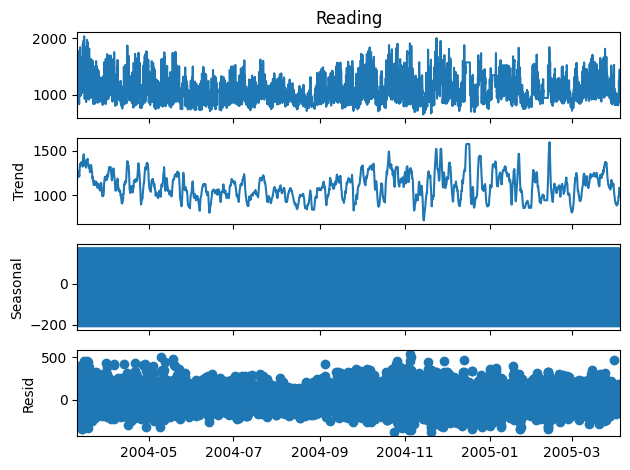

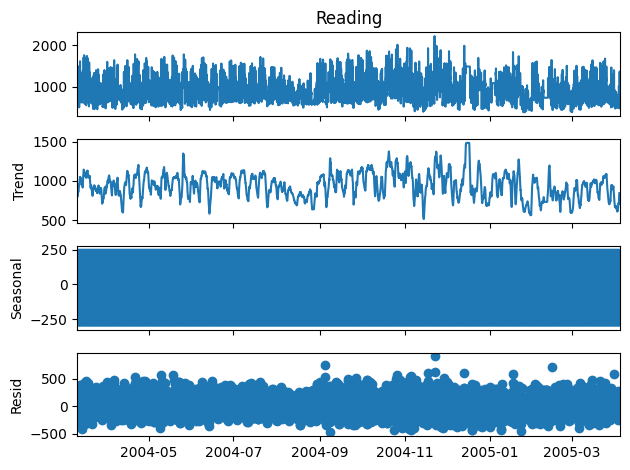

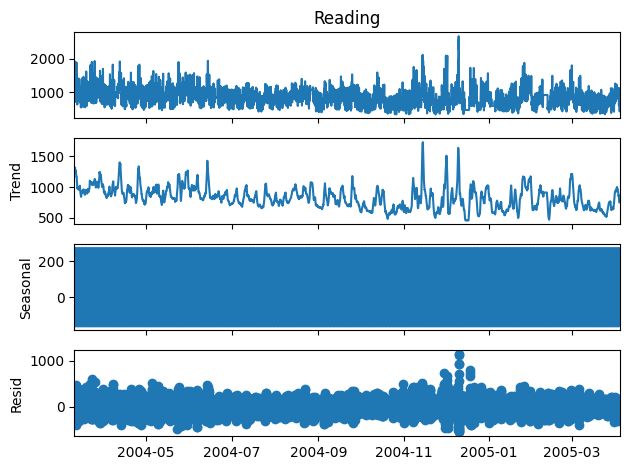

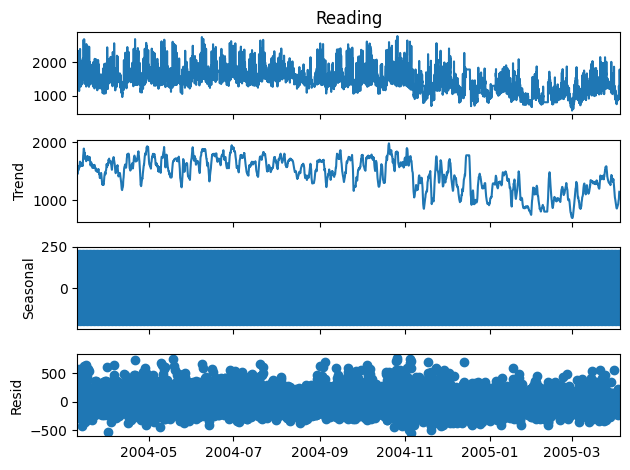

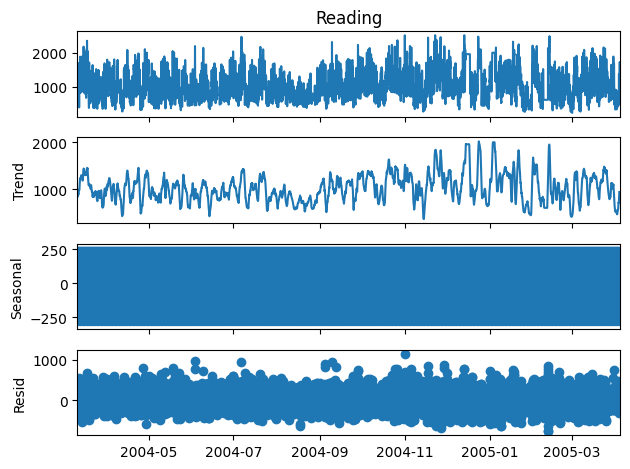

In [69]:
# plot seasonal decomposition of each sensor reading
from statsmodels.tsa.seasonal import seasonal_decompose

for sensor in df['Sensor'].unique():
    df_temp = df[df['Sensor'] == sensor]
    df_temp = df_temp.set_index('DateTime')
    result = seasonal_decompose(df_temp['Reading'], model='additive', period=24)
    result.plot()
    plt.show()

In [70]:
df.head()

Sensor            DateTime  Reading      T         RH        AH
0  PT08.S1(CO) 2004-03-10 18:00:00  1360.00  13.60  48.875001  0.757754
1  PT08.S1(CO) 2004-03-10 19:00:00  1292.25  13.30  47.700000  0.725487
2  PT08.S1(CO) 2004-03-10 20:00:00  1402.00  11.90  53.975000  0.750239
3  PT08.S1(CO) 2004-03-10 21:00:00  1375.50  11.00  60.000000  0.786713
4  PT08.S1(CO) 2004-03-10 22:00:00  1272.25  11.15  59.575001  0.788794

In [71]:
df.to_csv(r'..\data\processed\AirQuality_Italy.csv', index=False)